In [1]:
import os
import pandas as pd
import statistics as stat
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Read the files containing either the core or the surface only residues

In [2]:
core_input_folder = "Surface information/core_residues_dataframes"
surface_input_folder = "Surface information/surface_residues_dataframes"
core_dataframes = {}
surface_dataframes = {}

def read_files(input_folder, dataframes):
    for file in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file)
        if file_path.endswith(".csv"):
        
            custom_name = file[:7]
            df = pd.read_csv(file_path)
            dataframes[custom_name] = df


read_files(core_input_folder, core_dataframes)
read_files(surface_input_folder, surface_dataframes)

## Read the files containing the Rostta/AntiBERTy and solvent access information

In [4]:
input_folder = "Surface information/clean_files_solvent_access_info"
surface_and_core_dataframes = {}


for file in os.listdir(input_folder):
    file_path = os.path.join(input_folder, file)
    if file_path.endswith(".csv"):
    
        custom_name = file[:7]
        df = pd.read_csv(file_path)
        surface_and_core_dataframes[custom_name] = df


In [6]:
base_folder = "Final work/Validation against clinically approved drugs"
targets = [
    "4hkz",
    "7mn8",
    "3eoa",
    "1bey",
    "1ce1",
    "1n8z",
    "1l7i",
    "6vi2_BA",
    "4hkz",
    "6b9y",
    "6bae"
]

for target in targets:
    os.makedirs(f"{base_folder}/{target}/{target}_means", exist_ok=True)
    os.makedirs(f"{base_folder}/{target}/{target}_pictures_and_pdb_files", exist_ok=True)

    for subfolder in ["chain", "all_amino_acids", "wt_aa_type", "mut_aa_type"]:
        os.makedirs(f"{base_folder}/{target}/{target}_means/{subfolder}", exist_ok=True)

## Calculate mean for both AntiBERTy and Rosetta scores (at each position)

this would be needed for the heatmaps later. We are trying to see if there are any patterns between how either Rosetta or AntiBERTy scores the mutational impact depending if the residue is exposed to water (solvent accessible) or not.

In [ ]:
chain_H_dir = "Surface information/means/chain_H"
chain_L_dir = "Surface information/means/chain_L"
os.makedirs(chain_H_dir, exist_ok=True)
os.makedirs(chain_L_dir, exist_ok=True)

for custom_name, df in surface_and_core_dataframes.items():
    residue_means_chain_H = {}
    residue_means_chain_L = {}
    
    residue_means_chain_H
    
    for position, group in df.groupby("IMGT numbering"):
        residue_means_chain_H[position] = group[group["chain"] == "H"].copy()
        residue_means_chain_L[position] = group[group["chain"] == "L"].copy()


    for chain, dictionary in [("H", residue_means_chain_H), ("L", residue_means_chain_L)]:
        means = []

        for group, df_chain in dictionary.items():
            if not df_chain.empty:
                Antiberty_score_mean = stat.mean(df_chain["AntiBERTy normalised"])
                Rosetta_score_mean = stat.mean(df_chain["Rosetta normalised"])
                surface_access_score = stat.mean(df_chain["Q(SASA)"])

                means.append({
                    "Position": df_chain["position"].iloc[0],
                    "IMGT numbering": df_chain["IMGT numbering"].iloc[0],
                    "Region": df_chain["region"].iloc[0],
                    "Amino acid": df_chain["WT_AA"].iloc[0],
                    "Antiberty_score_mean": Antiberty_score_mean,
                    "Rosetta_score_mean": Rosetta_score_mean,
                    "surface_access_score": surface_access_score
                })
            
        mean_df = pd.DataFrame(means)
        if chain == "H":
            output_path = os.path.join(chain_H_dir, f"{custom_name}.csv")
        elif chain == "L":
            output_path = os.path.join(chain_L_dir, f"{custom_name}.csv")
        mean_df.to_csv(output_path, index=False)

In [5]:
"""
this is the above code but more time efficient 
"""

chain_H_dir = "Surface information/means/chain_H"
chain_L_dir = "Surface information/means/chain_L"
os.makedirs(chain_H_dir, exist_ok=True)
os.makedirs(chain_L_dir, exist_ok=True)

for custom_name, df in surface_and_core_dataframes.items():
    df_chain_H = df[df["chain"] == "H"]
    df_chain_L = df[df["chain"] == "L"]
    
    for chain, df_chain in [("H", df_chain_H), ("L", df_chain_L)]:
        if not df_chain.empty:
            means = df_chain.groupby("IMGT numbering").agg({
                "position": "first",
                "region": "first",
                "WT_AA": "first",
                "AntiBERTy normalised": "mean",
                "Rosetta normalised": "mean",
                "Q(SASA)": "mean"
            }).reset_index()
            
            output_path = os.path.join(chain_H_dir if chain == "H" else chain_L_dir, f"{custom_name}.csv")
            means.to_csv(output_path, index=False)

## Create heatmaps

<Figure size 640x480 with 0 Axes>

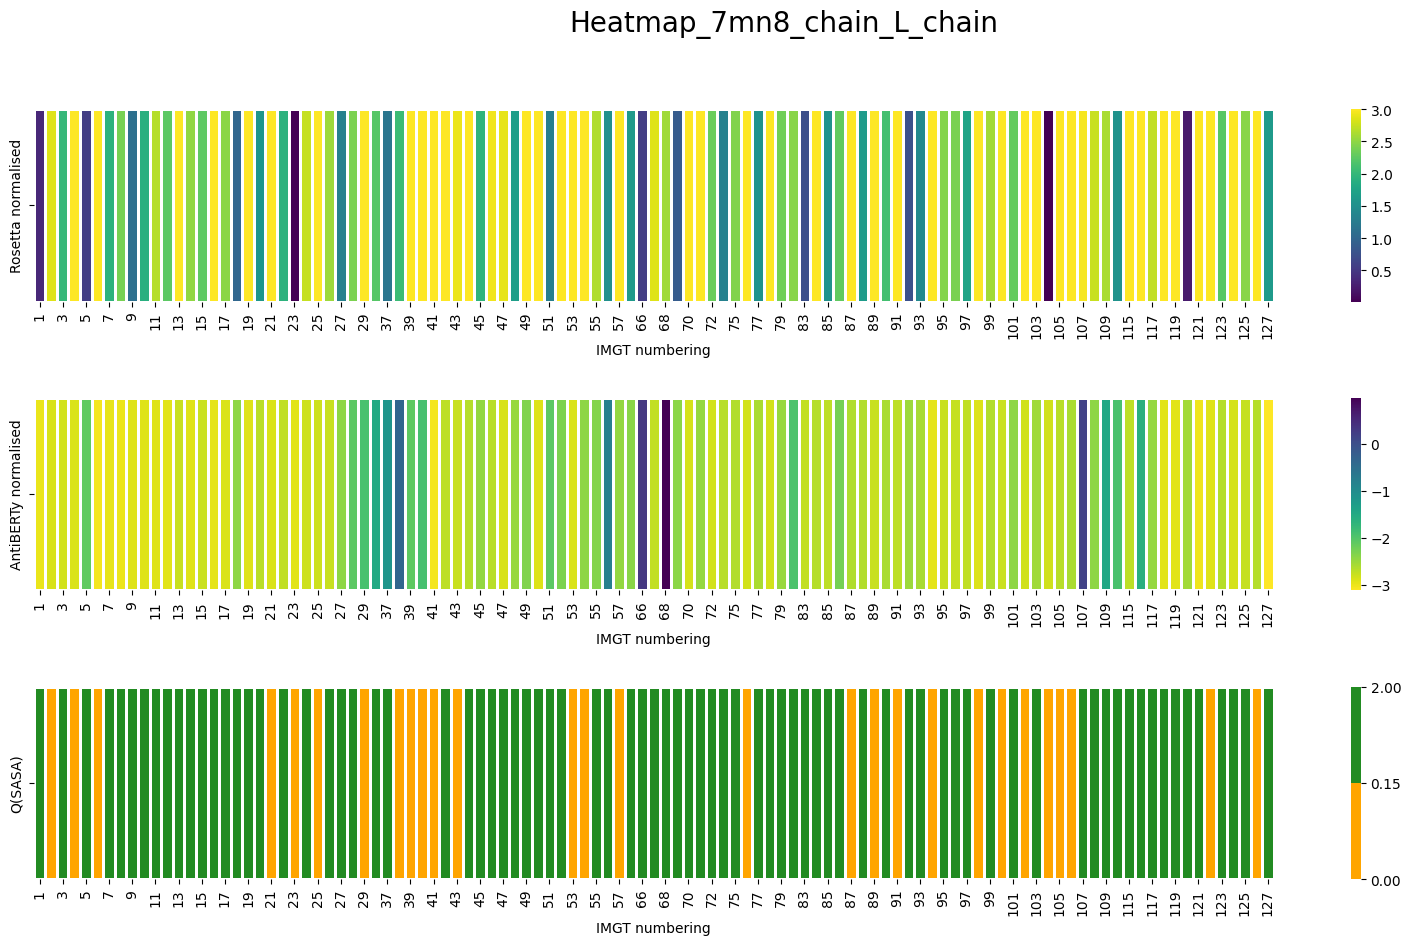

<Figure size 640x480 with 0 Axes>

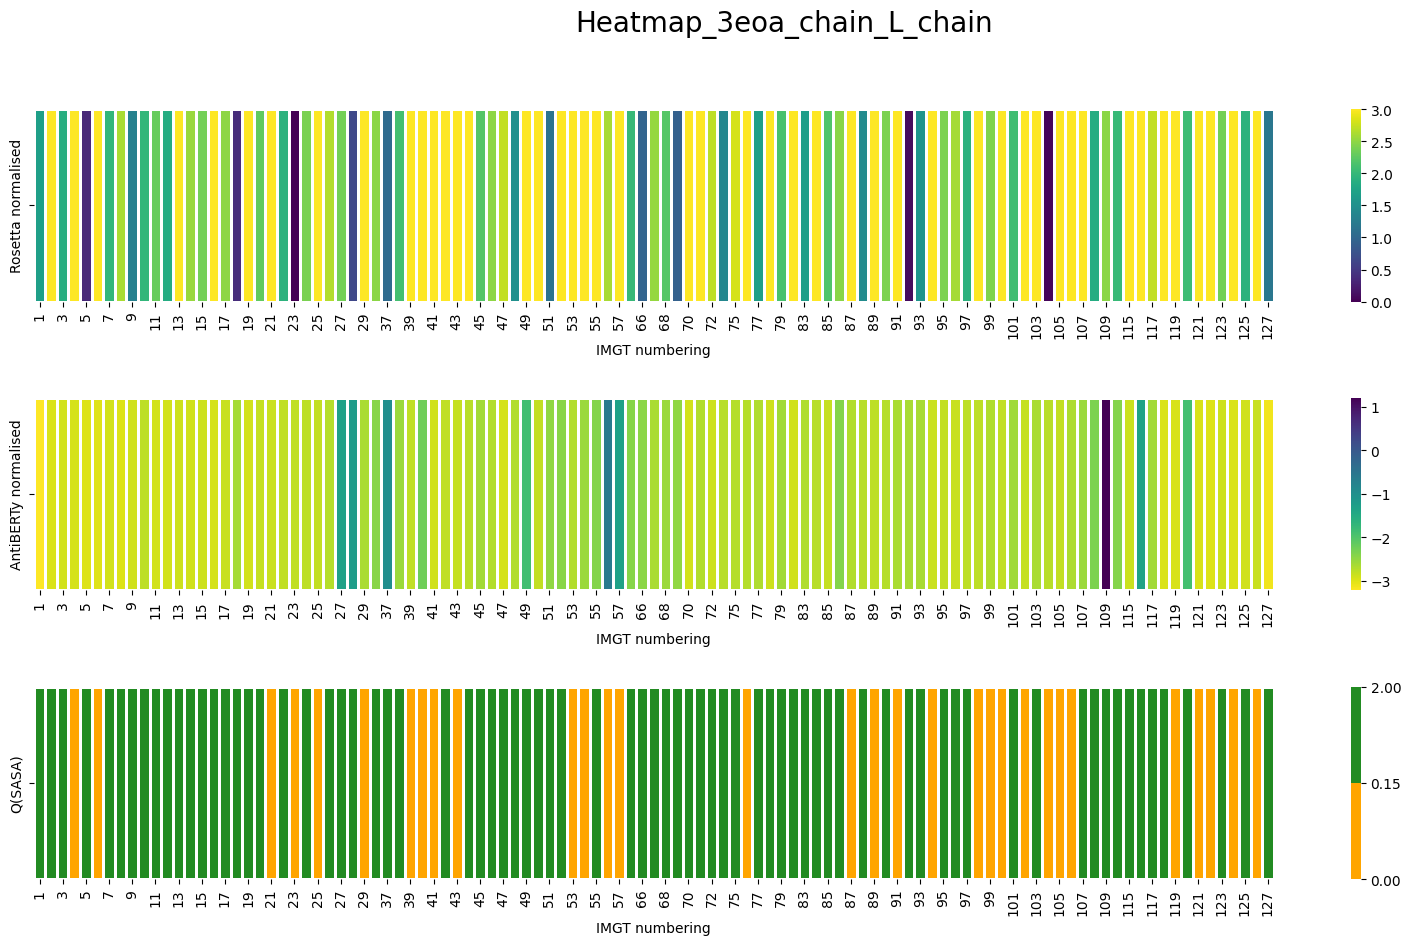

<Figure size 640x480 with 0 Axes>

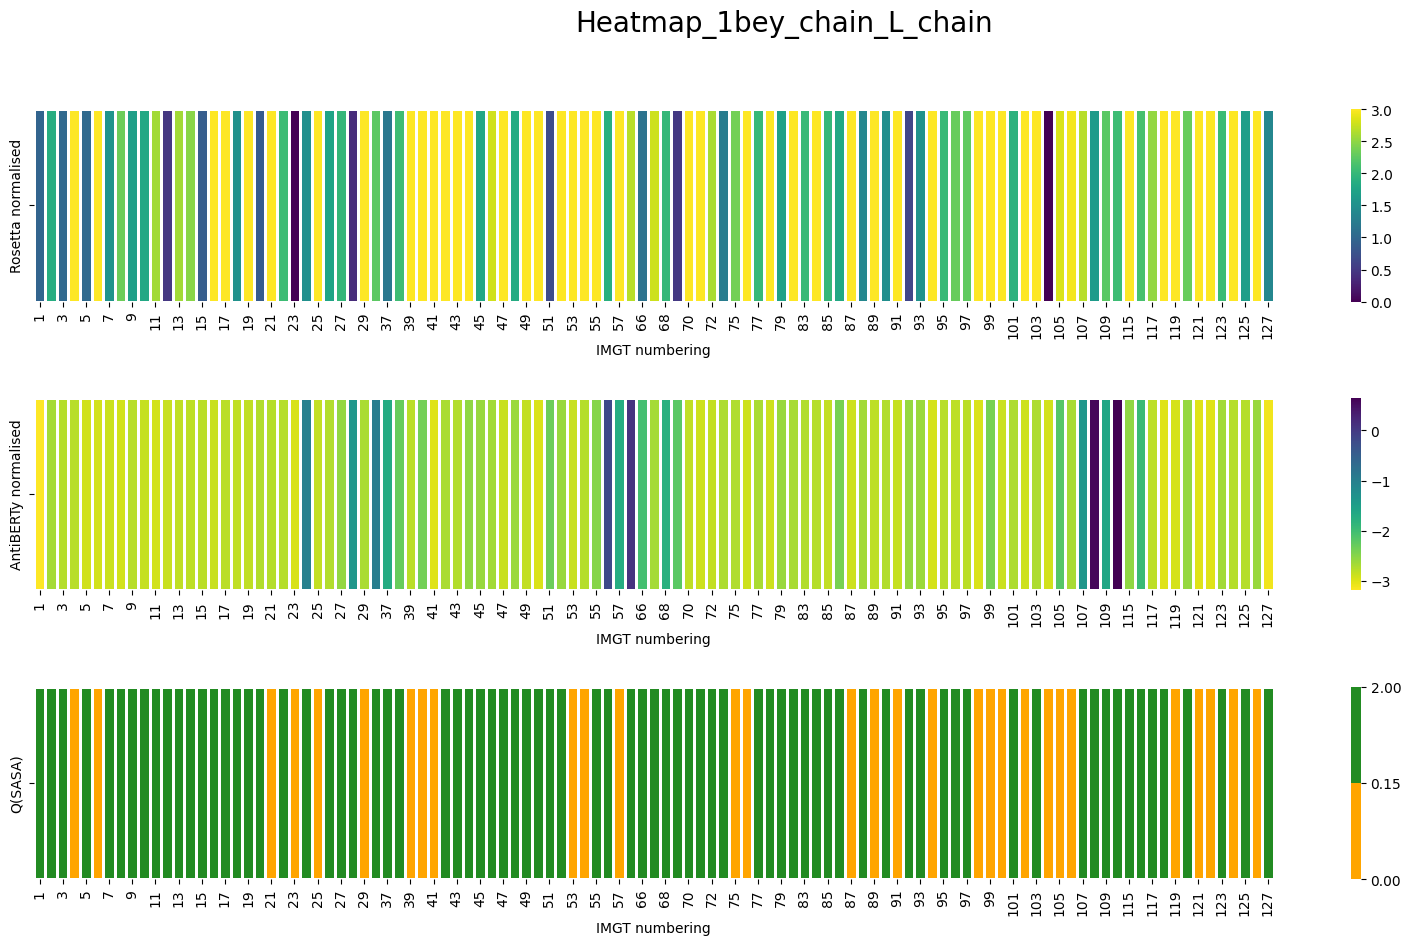

<Figure size 640x480 with 0 Axes>

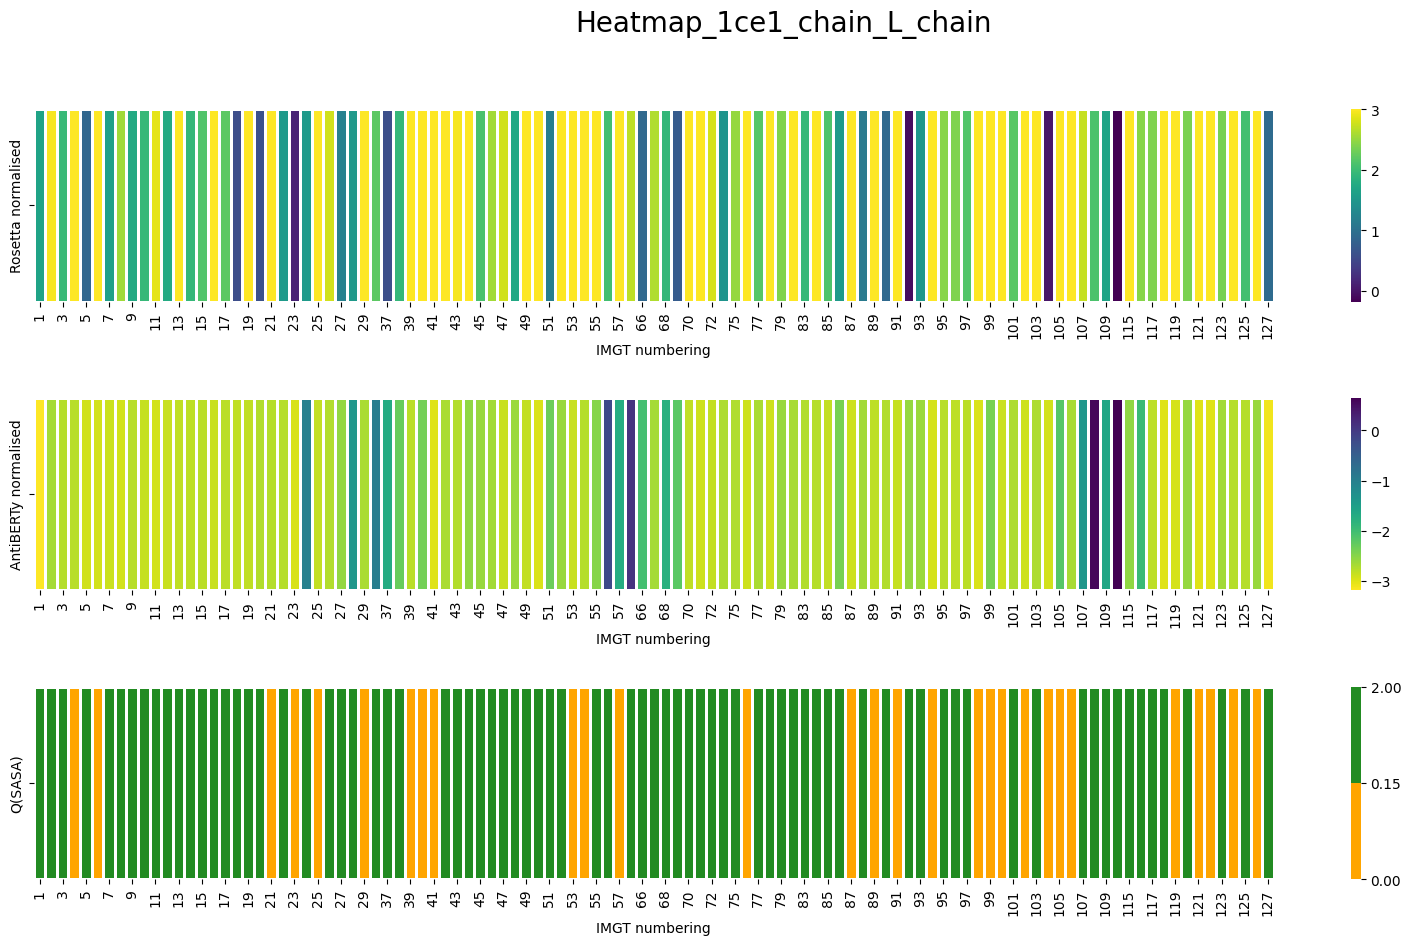

<Figure size 640x480 with 0 Axes>

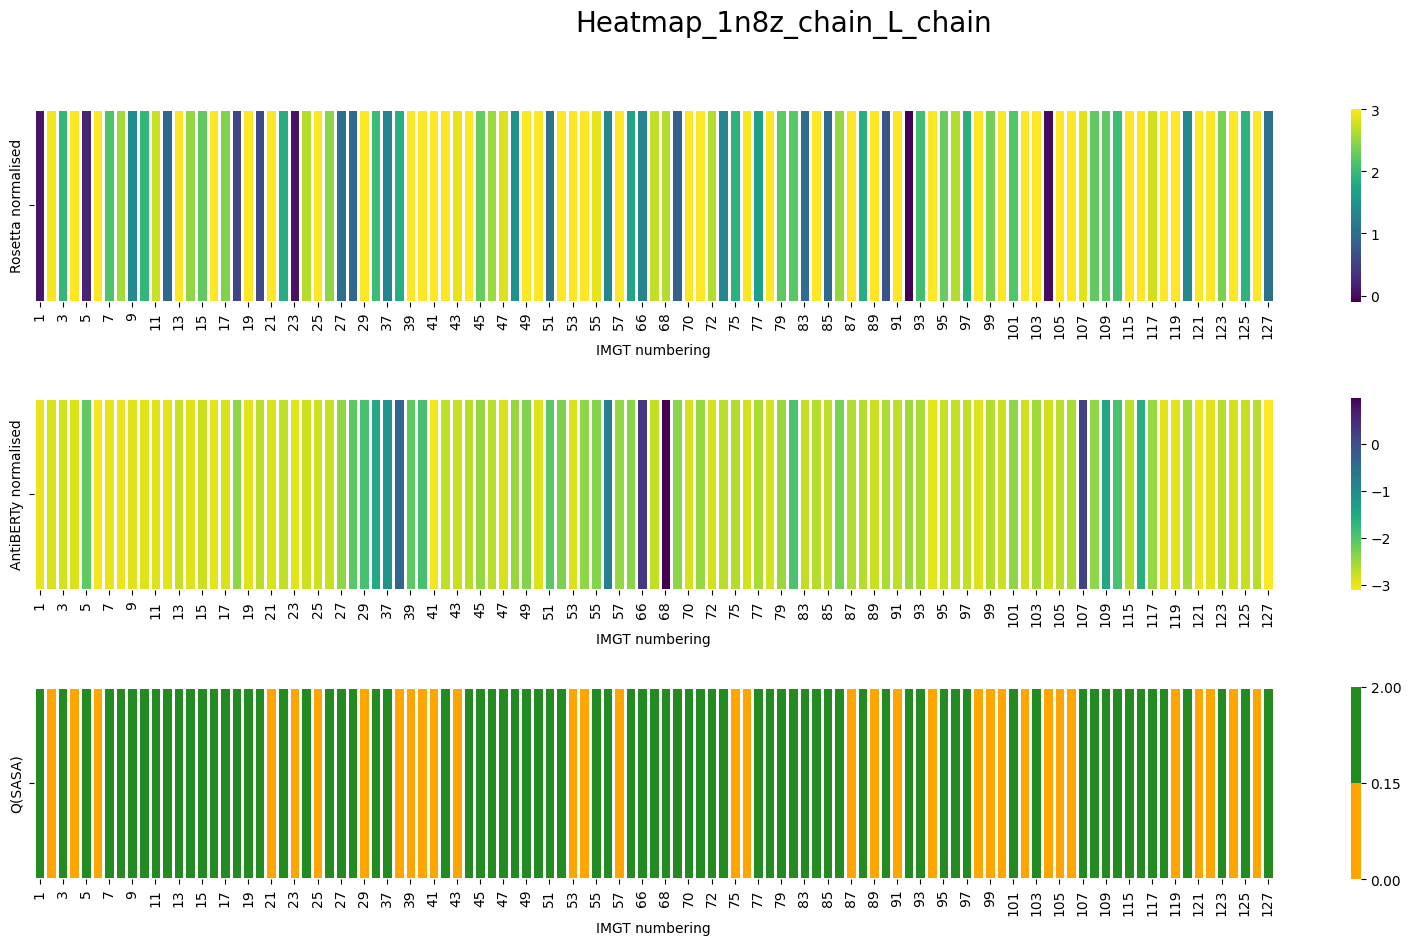

<Figure size 640x480 with 0 Axes>

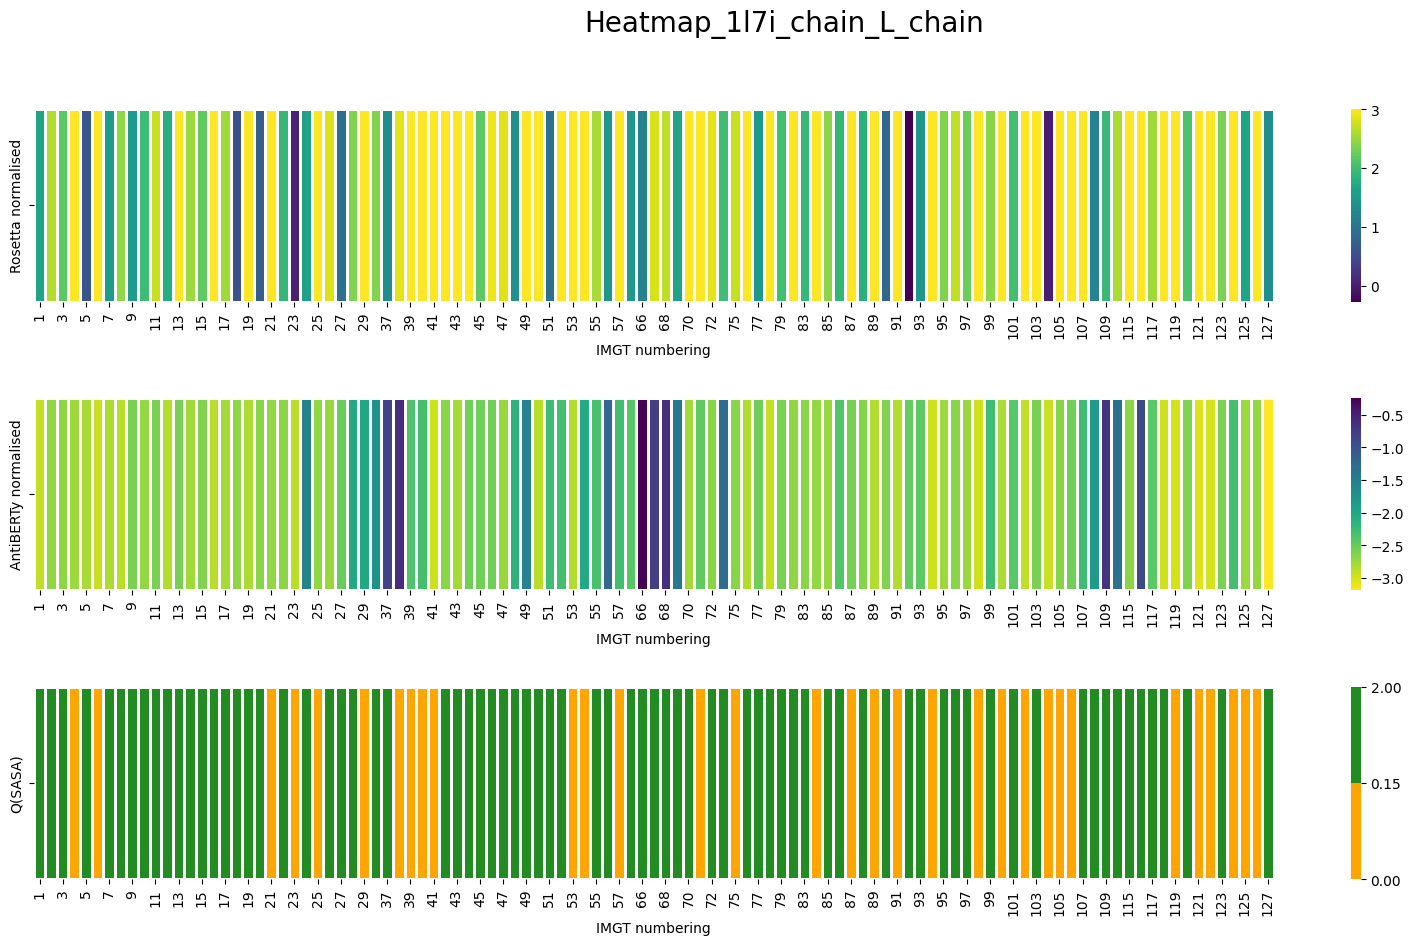

<Figure size 640x480 with 0 Axes>

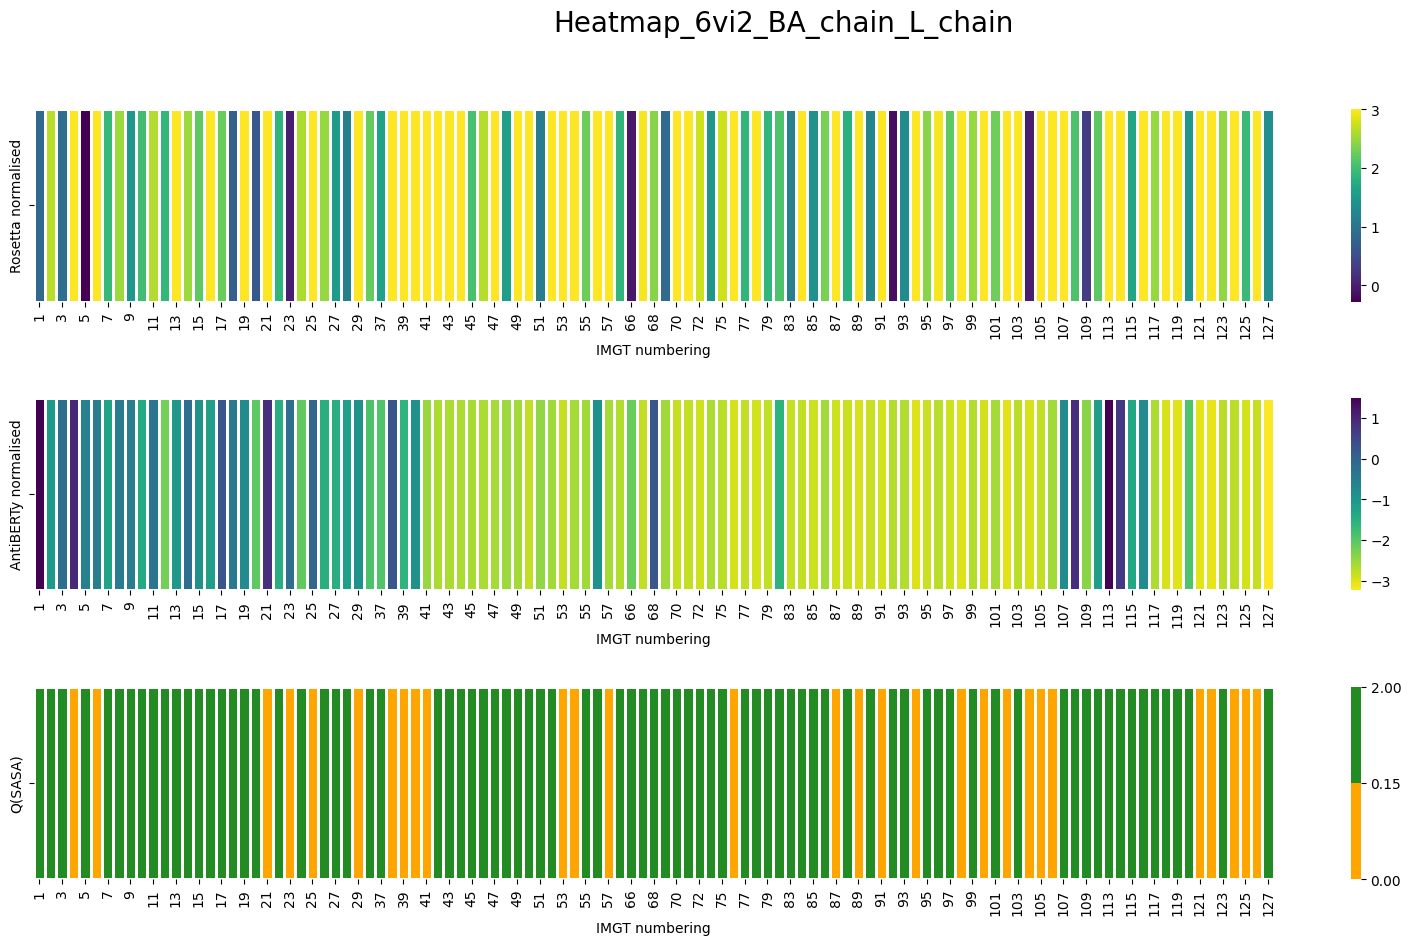

<Figure size 640x480 with 0 Axes>

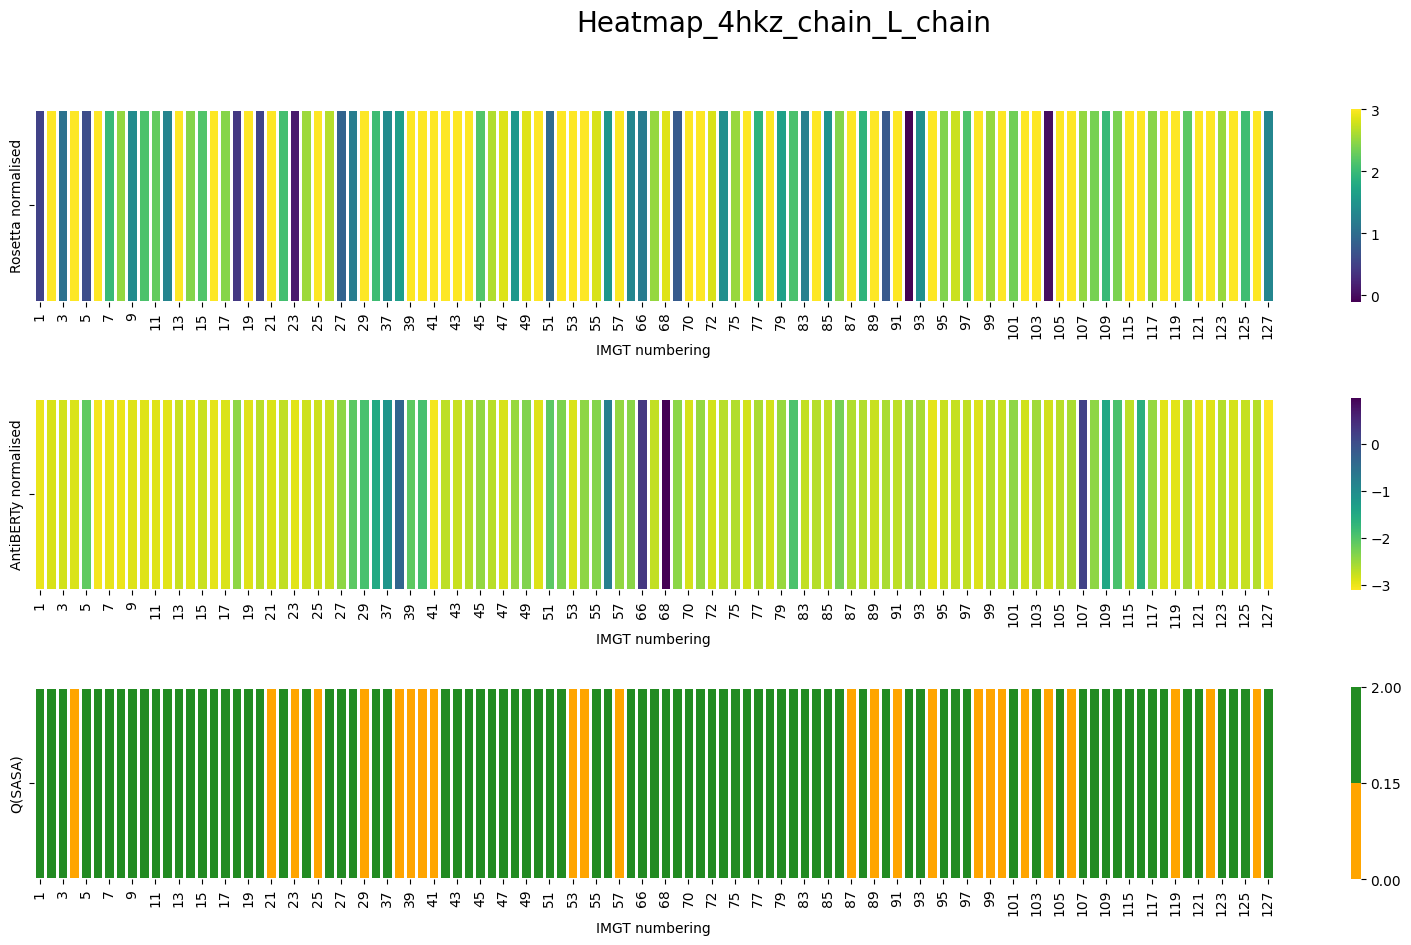

<Figure size 640x480 with 0 Axes>

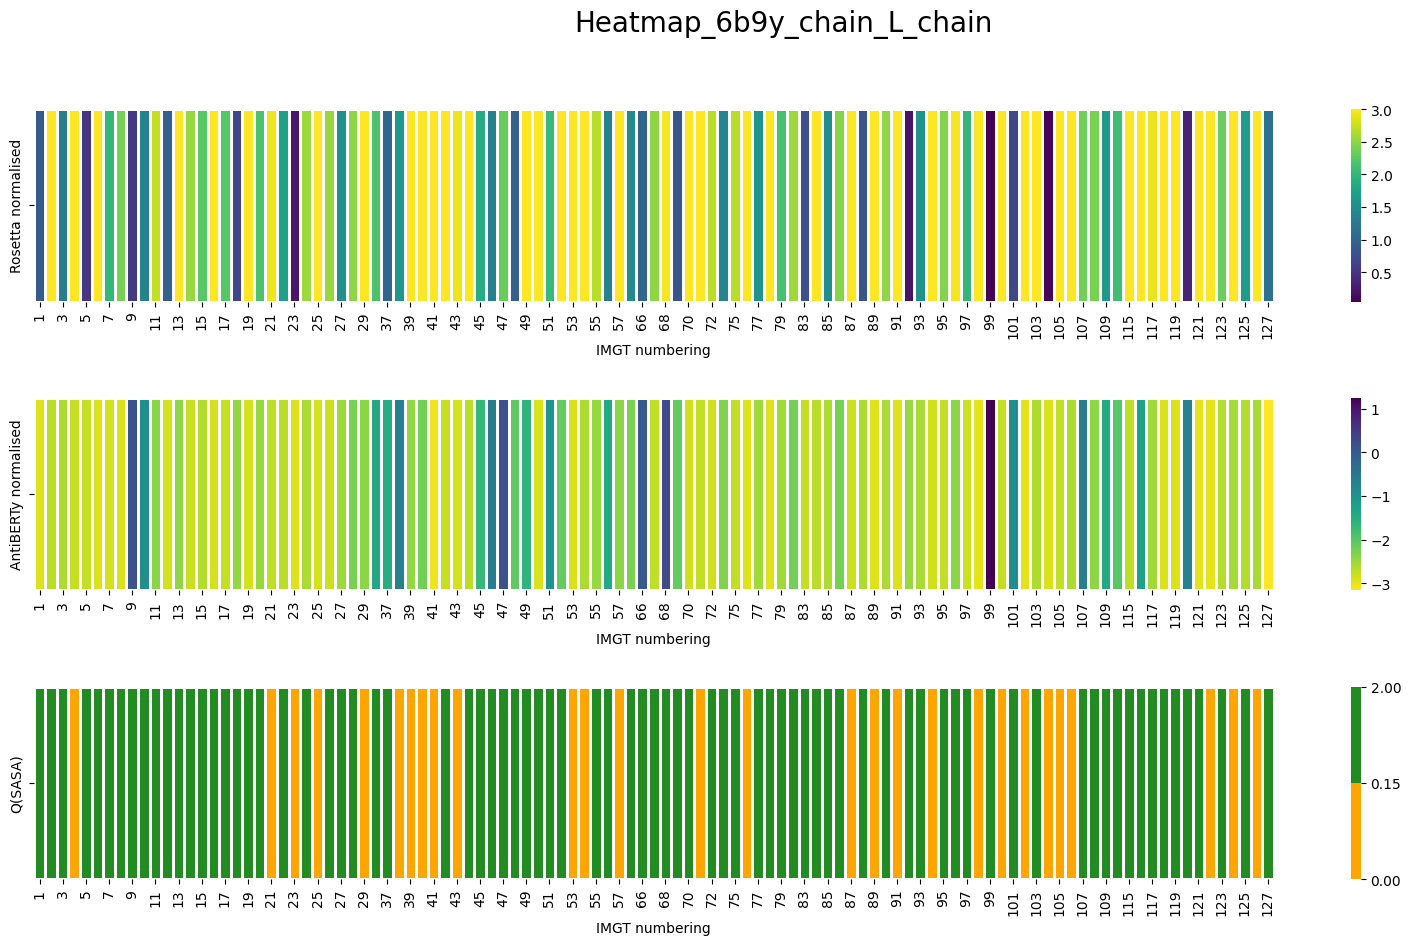

<Figure size 640x480 with 0 Axes>

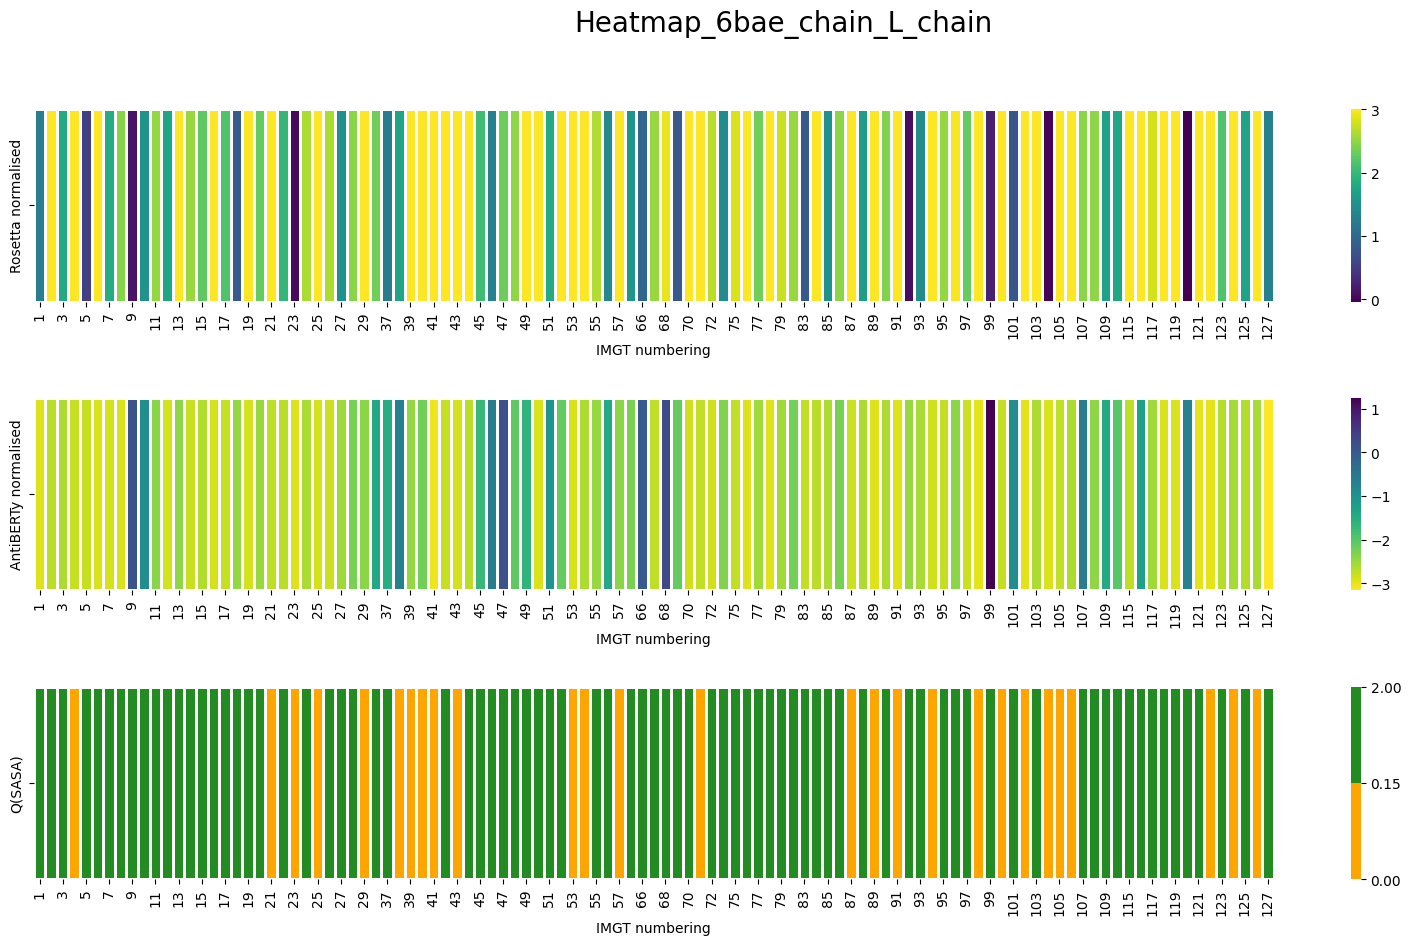

<Figure size 640x480 with 0 Axes>

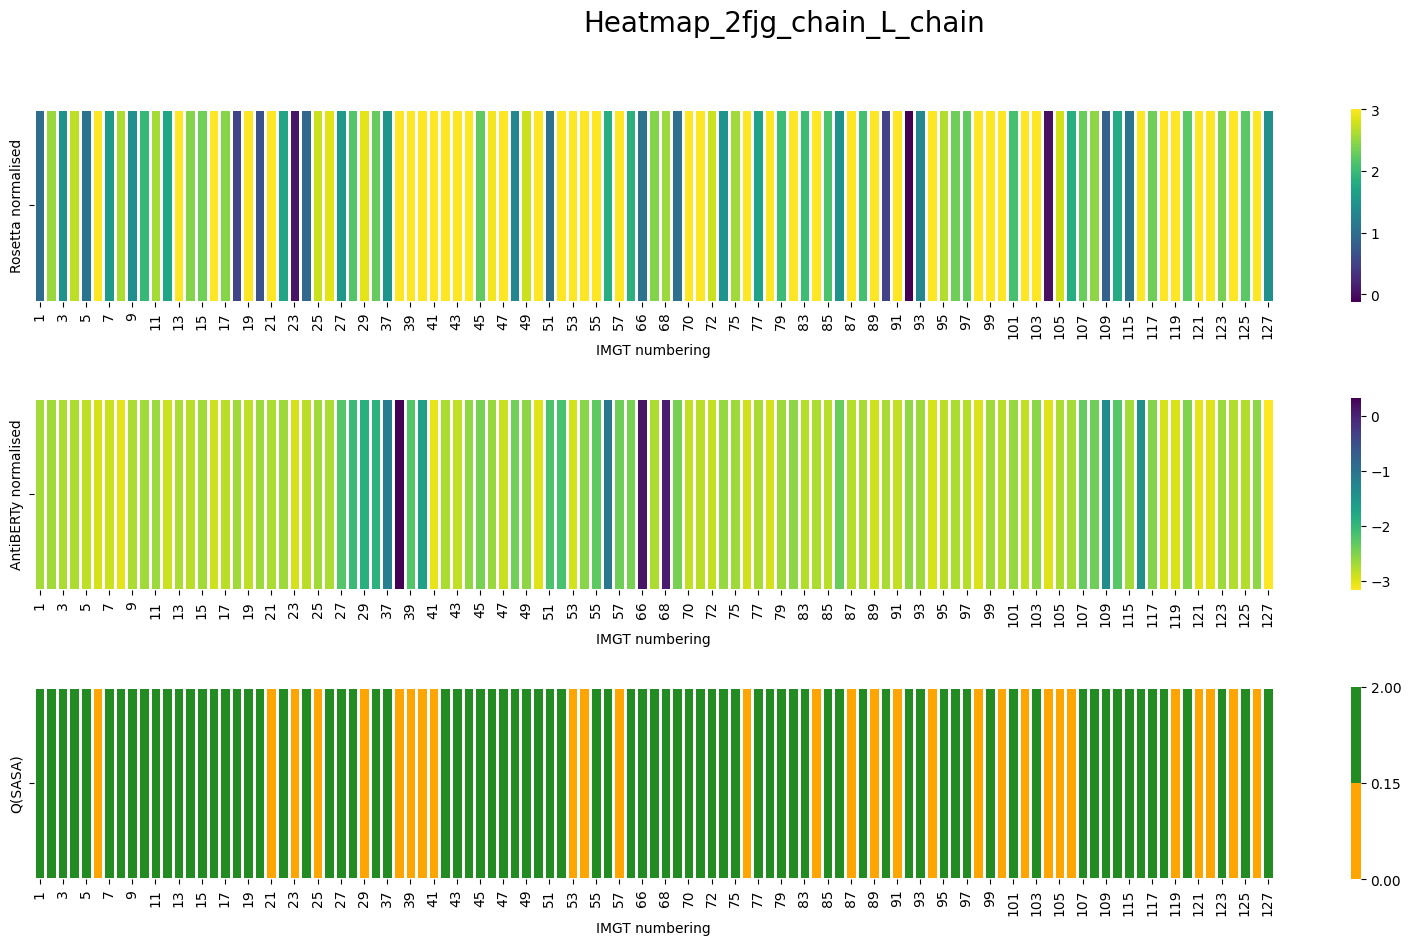

<Figure size 640x480 with 0 Axes>

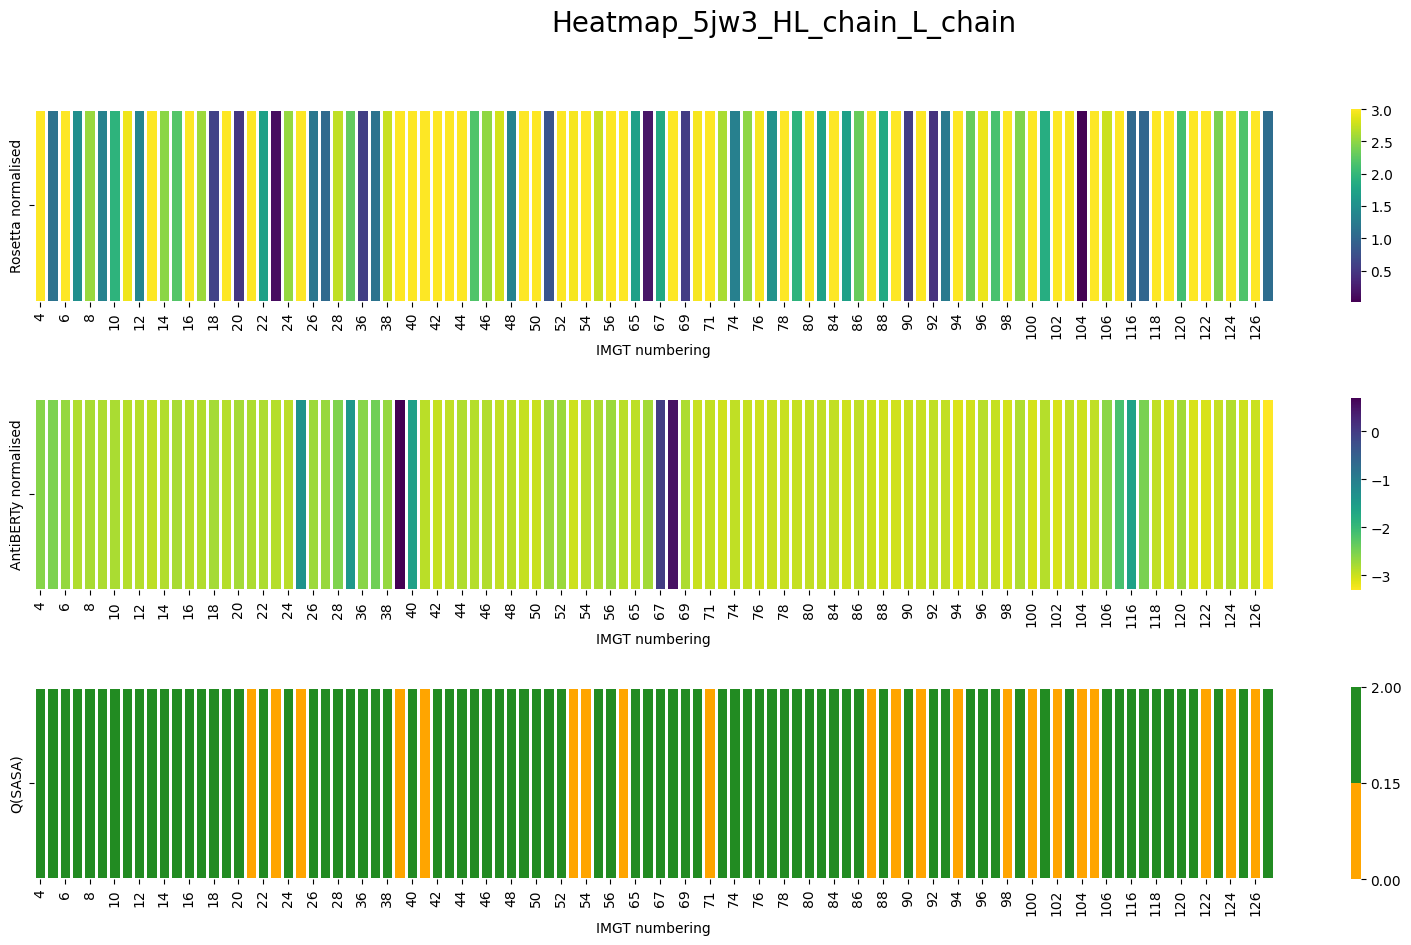

<Figure size 640x480 with 0 Axes>

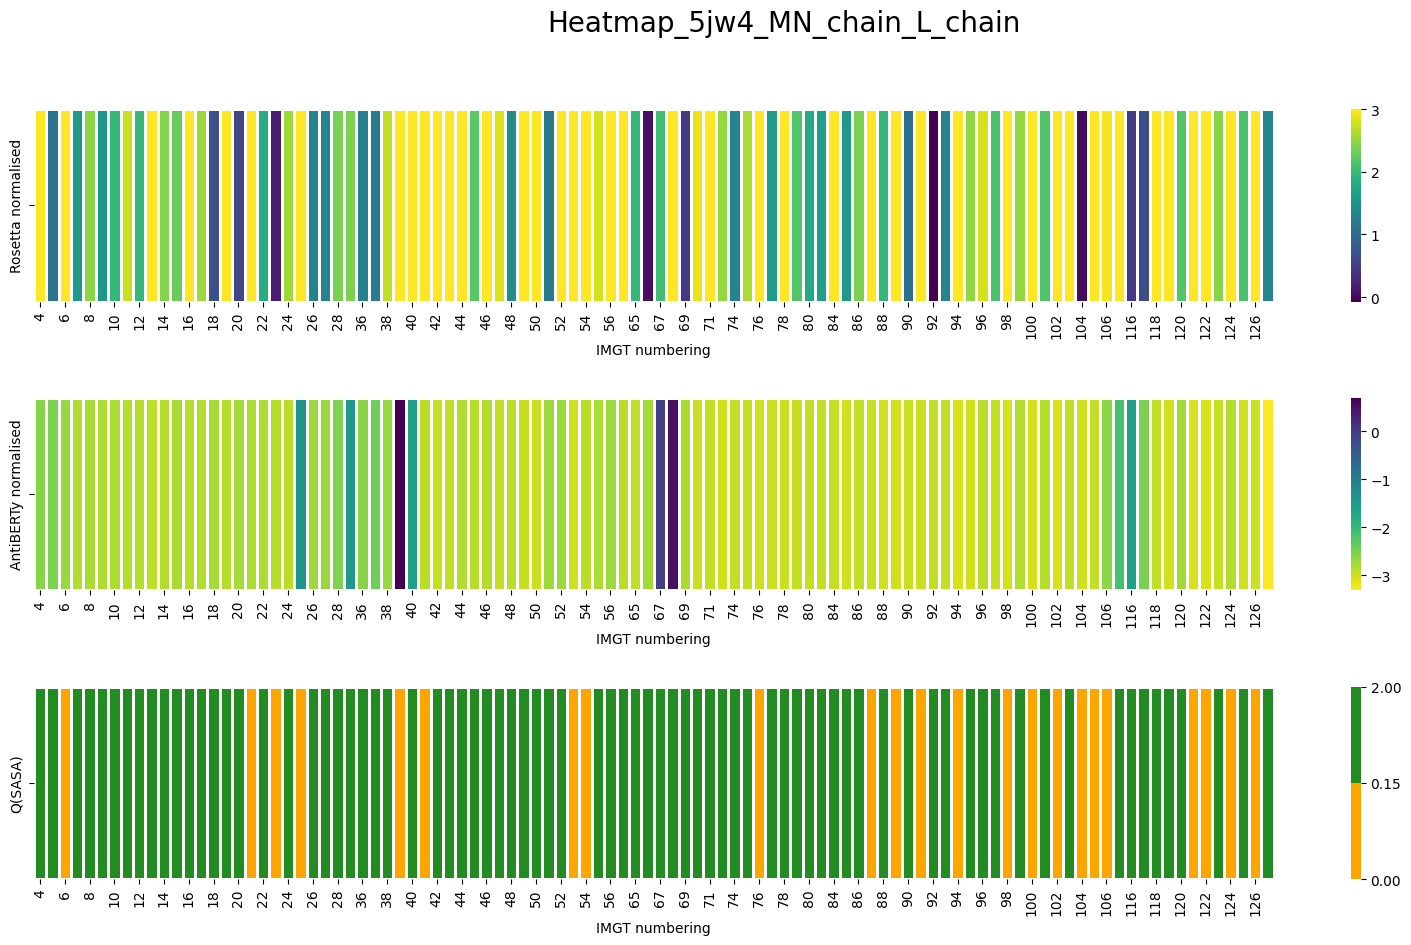

<Figure size 640x480 with 0 Axes>

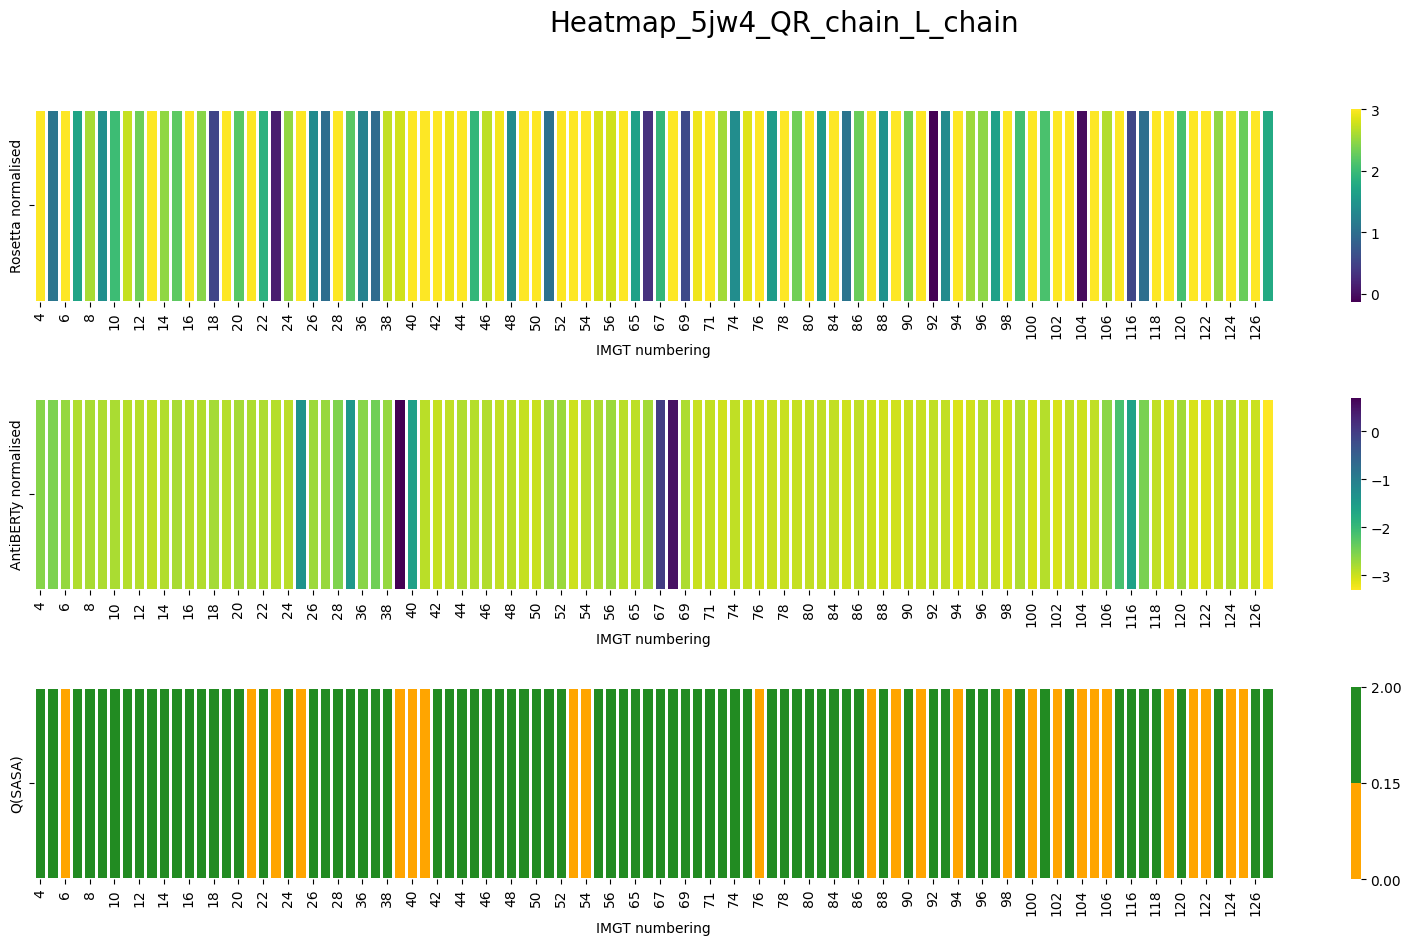

<Figure size 640x480 with 0 Axes>

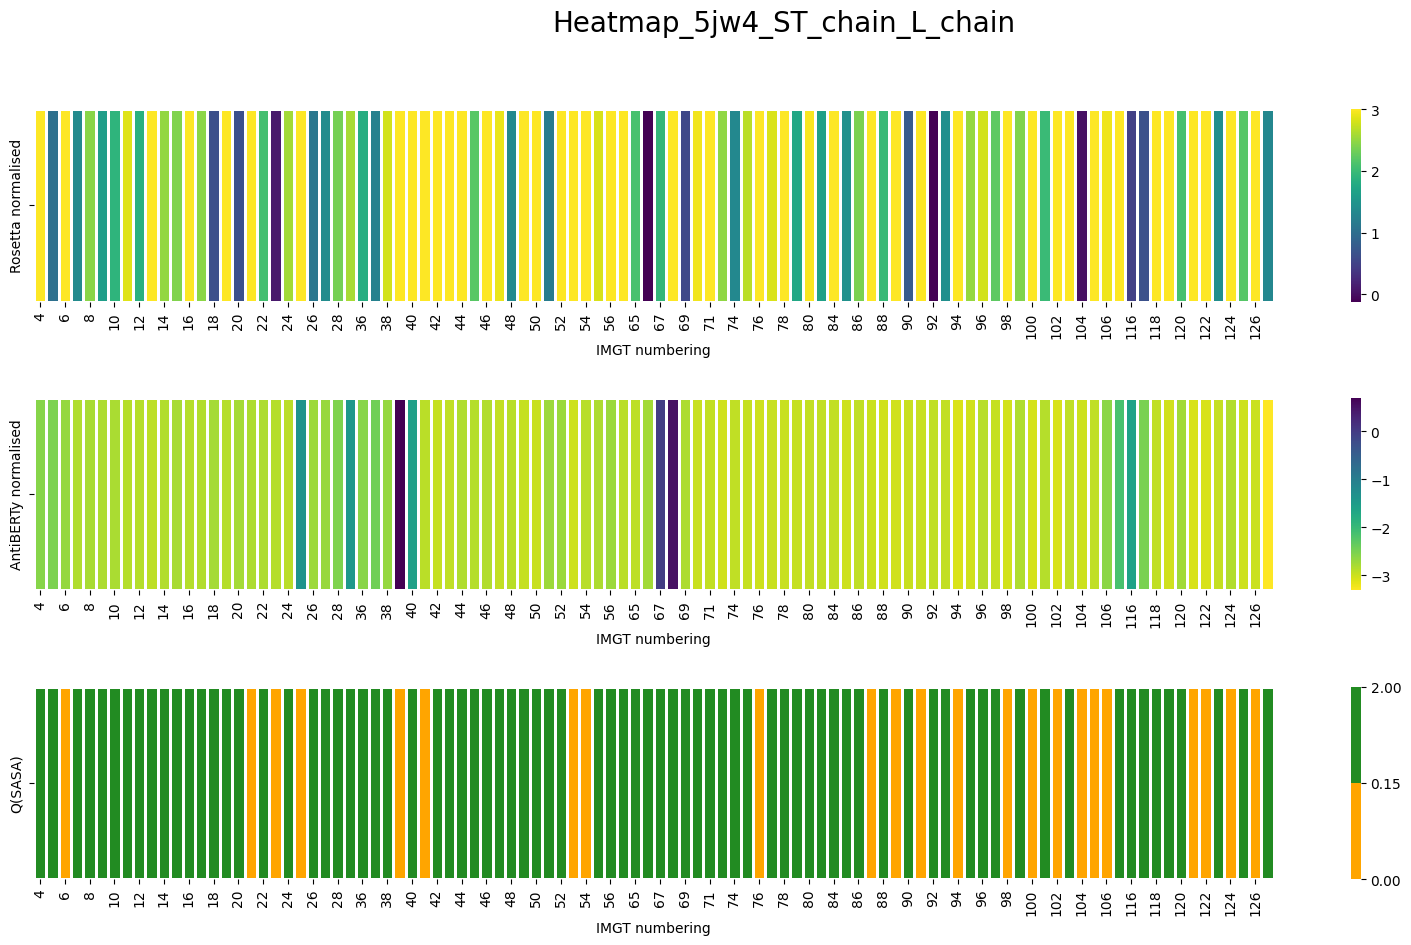

<Figure size 640x480 with 0 Axes>

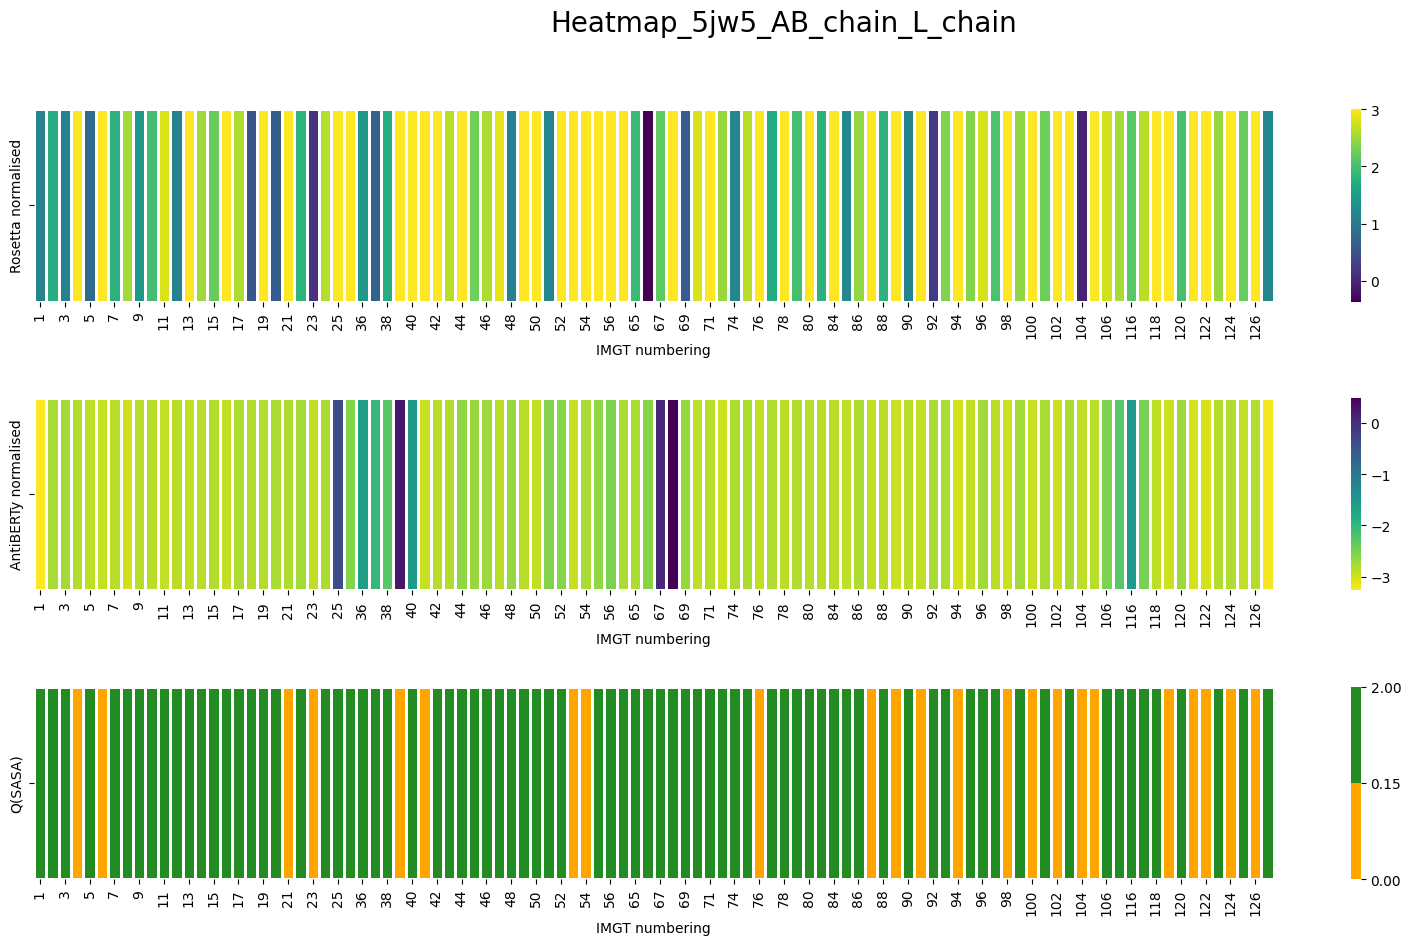

<Figure size 640x480 with 0 Axes>

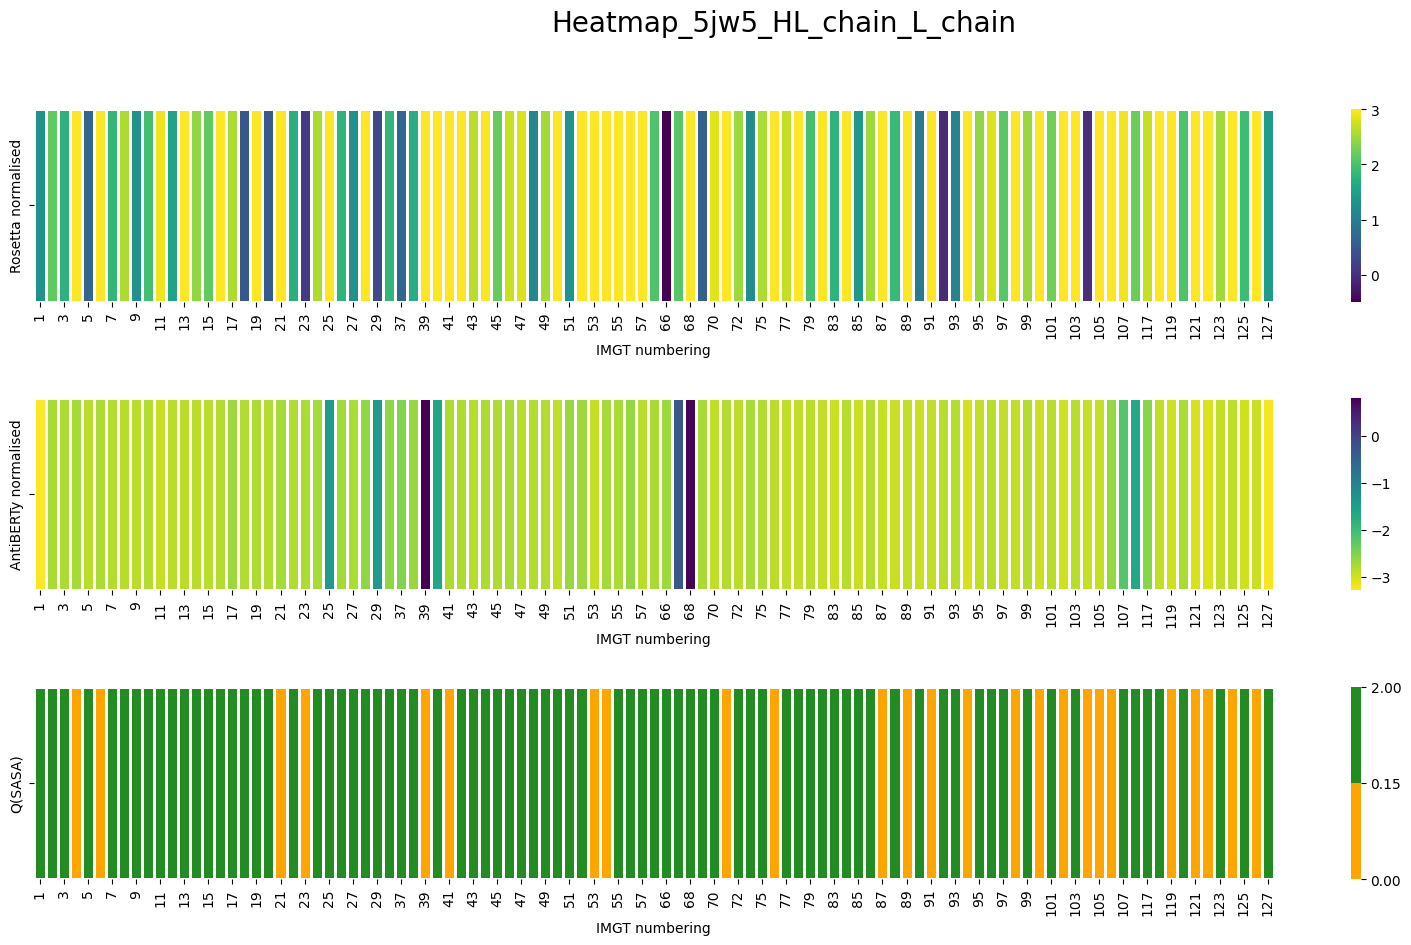

<Figure size 640x480 with 0 Axes>

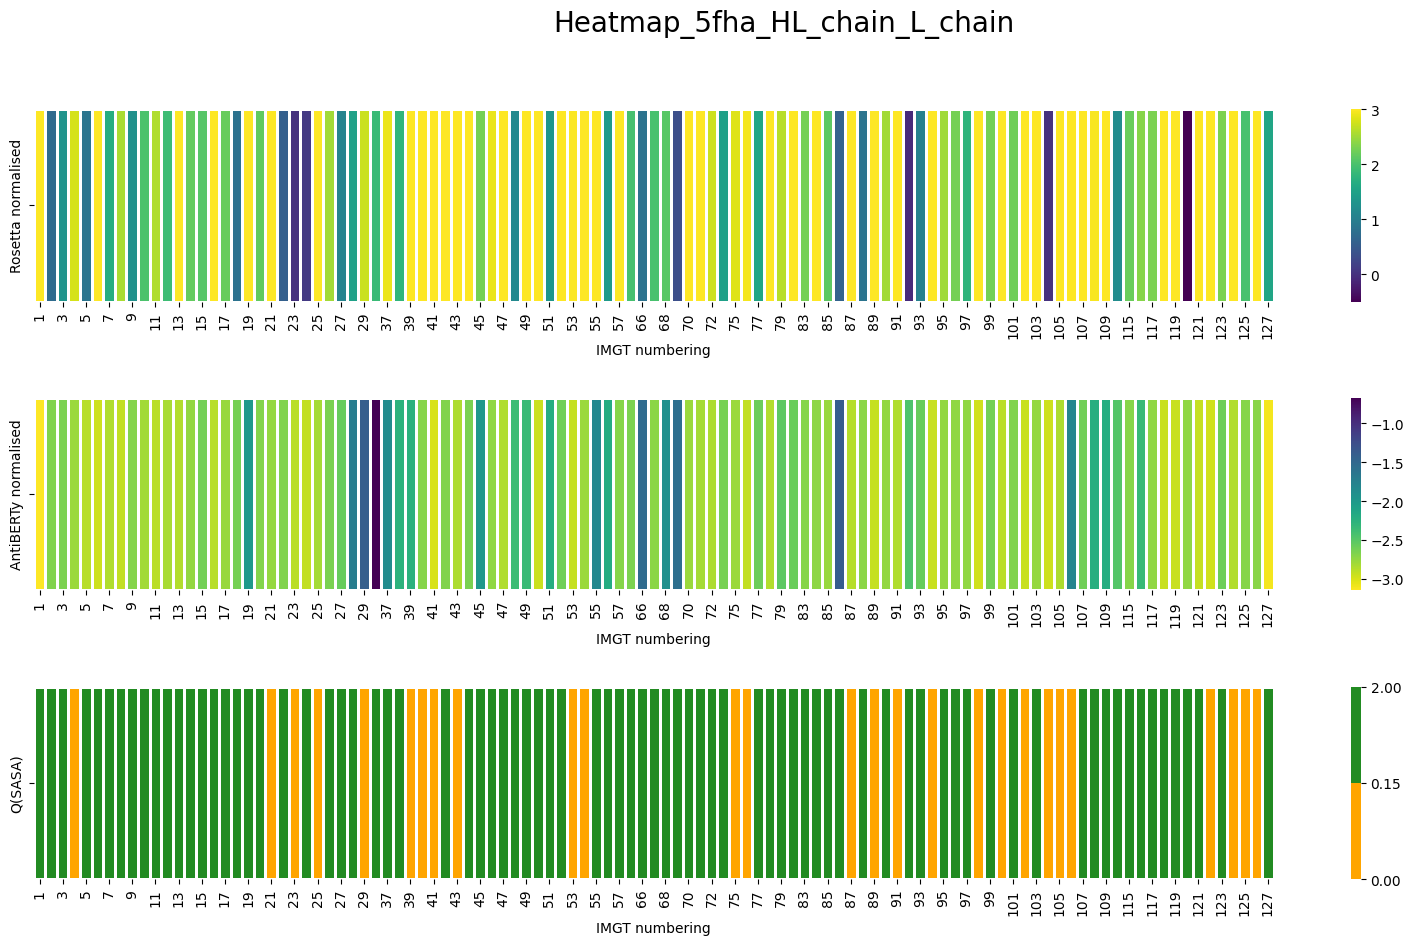

<Figure size 640x480 with 0 Axes>

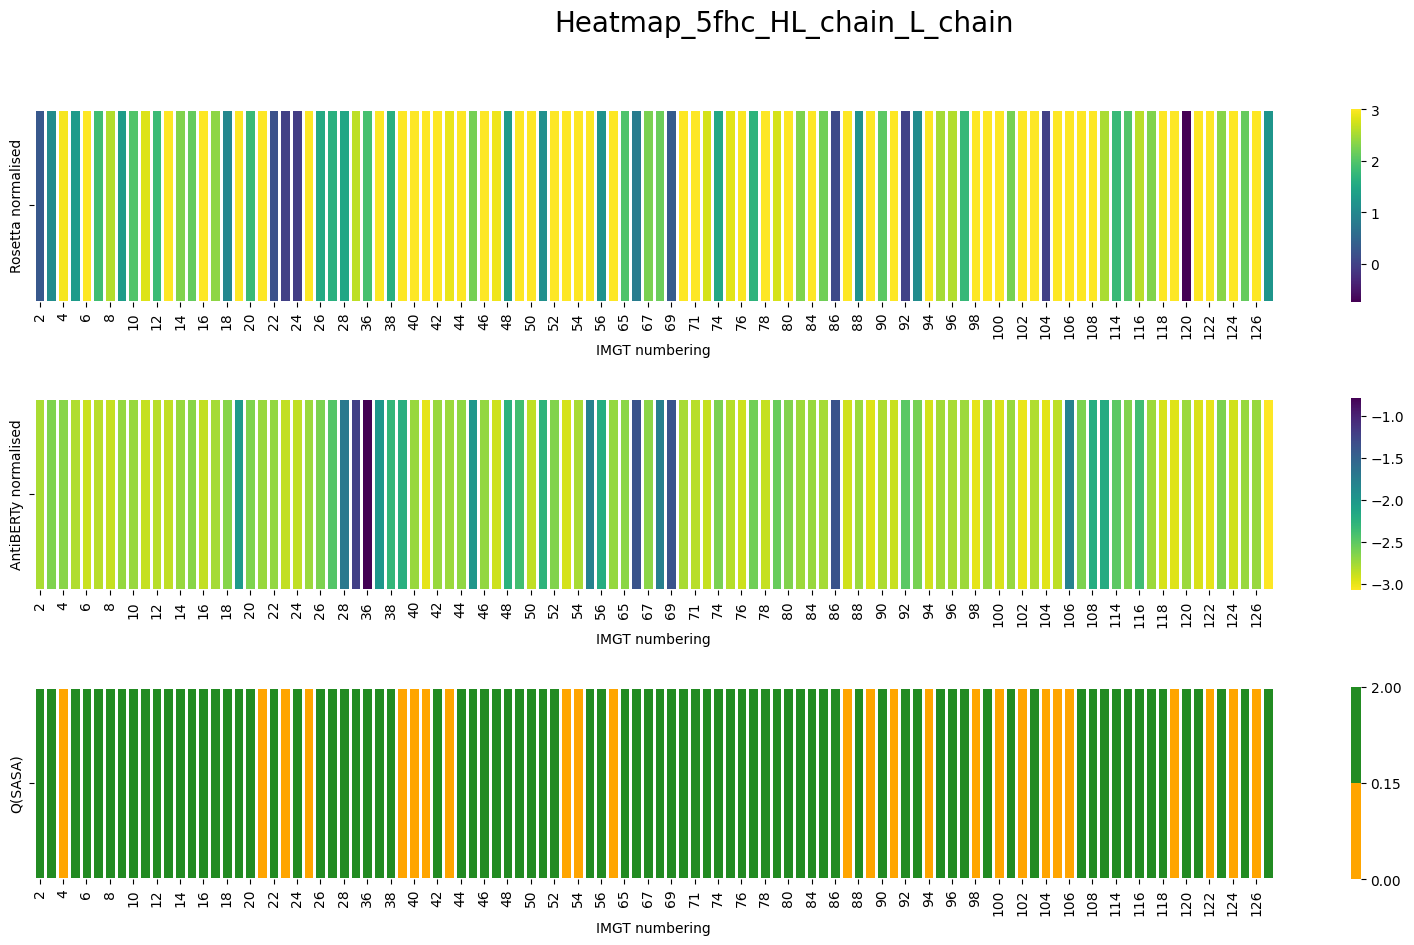

<Figure size 640x480 with 0 Axes>

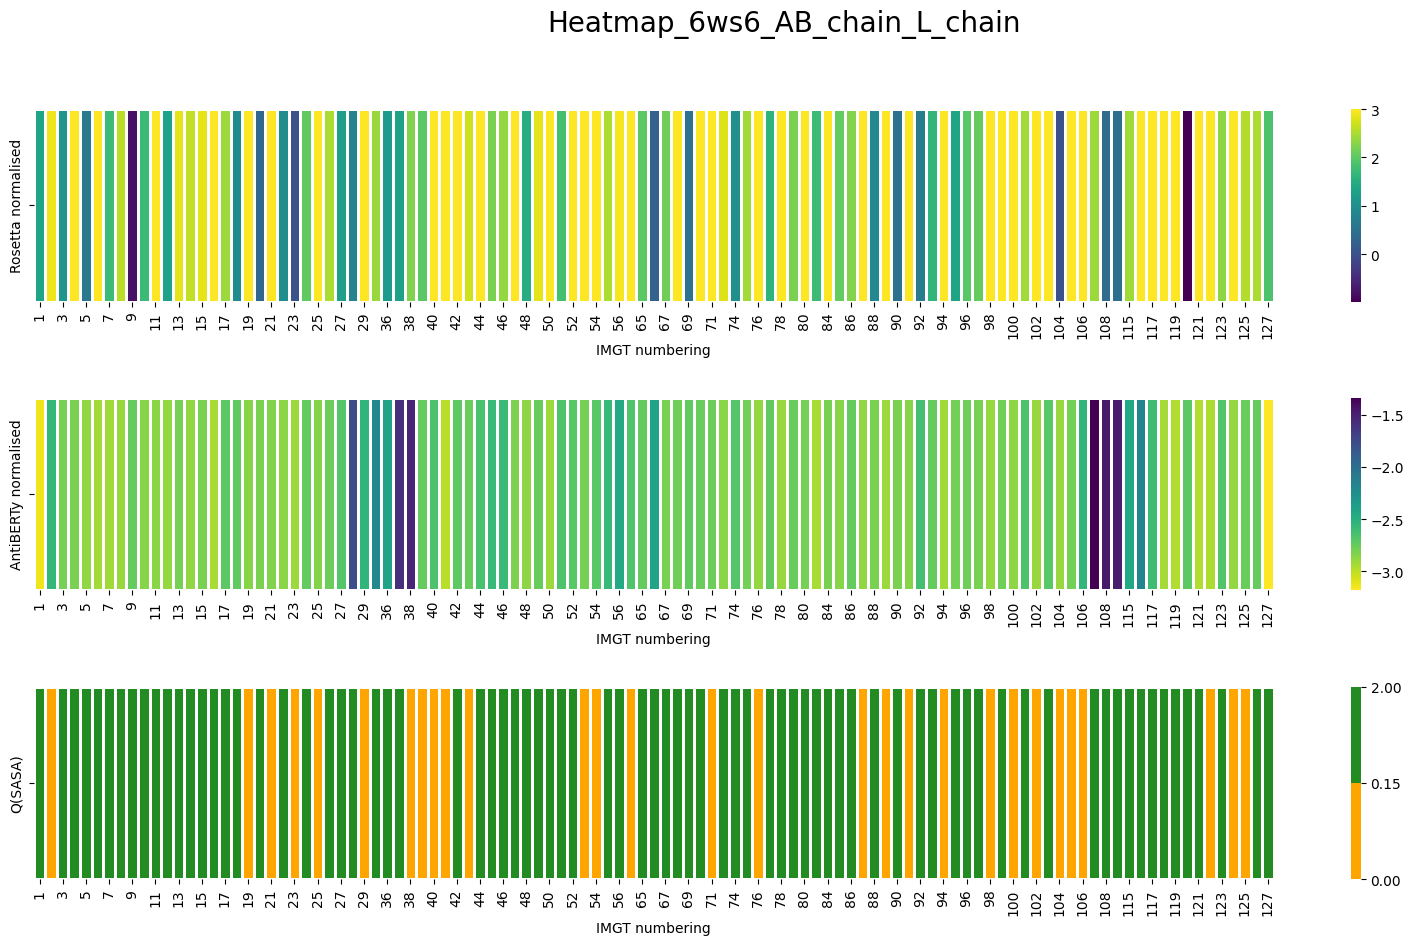

<Figure size 640x480 with 0 Axes>

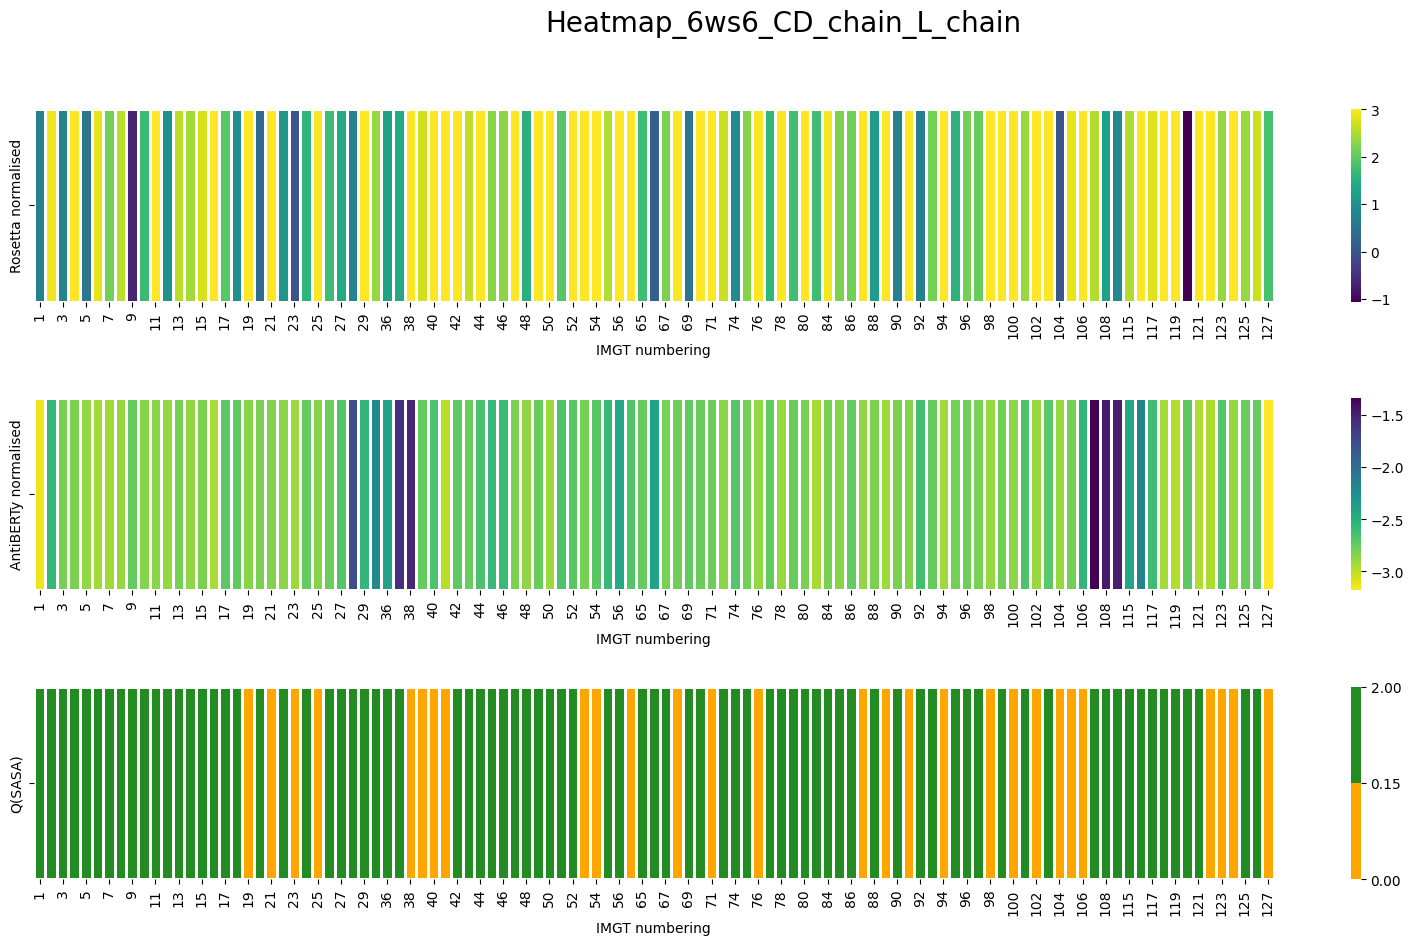

<Figure size 640x480 with 0 Axes>

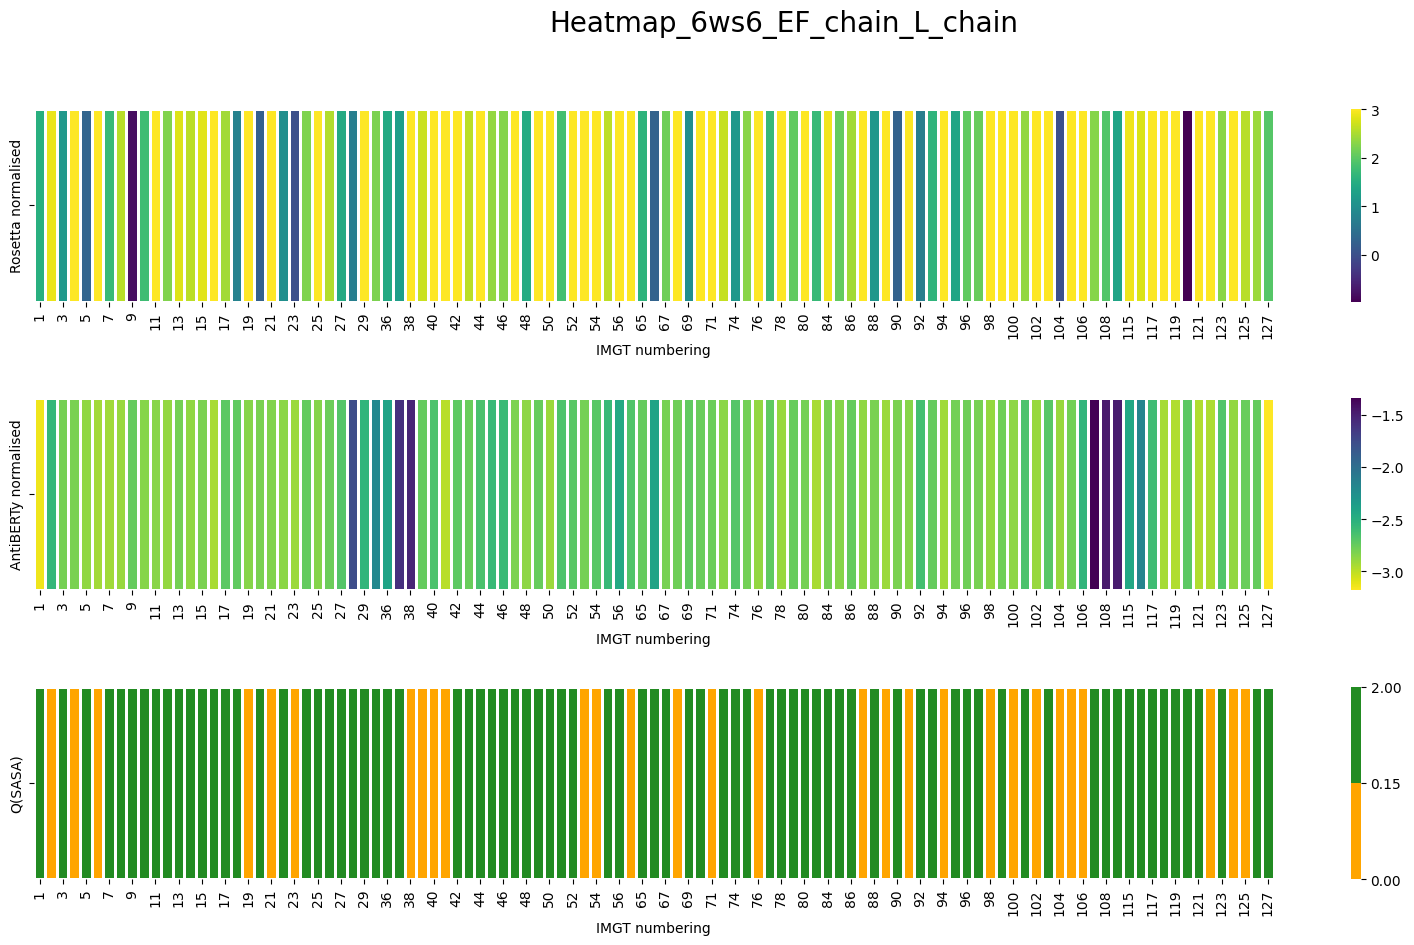

<Figure size 640x480 with 0 Axes>

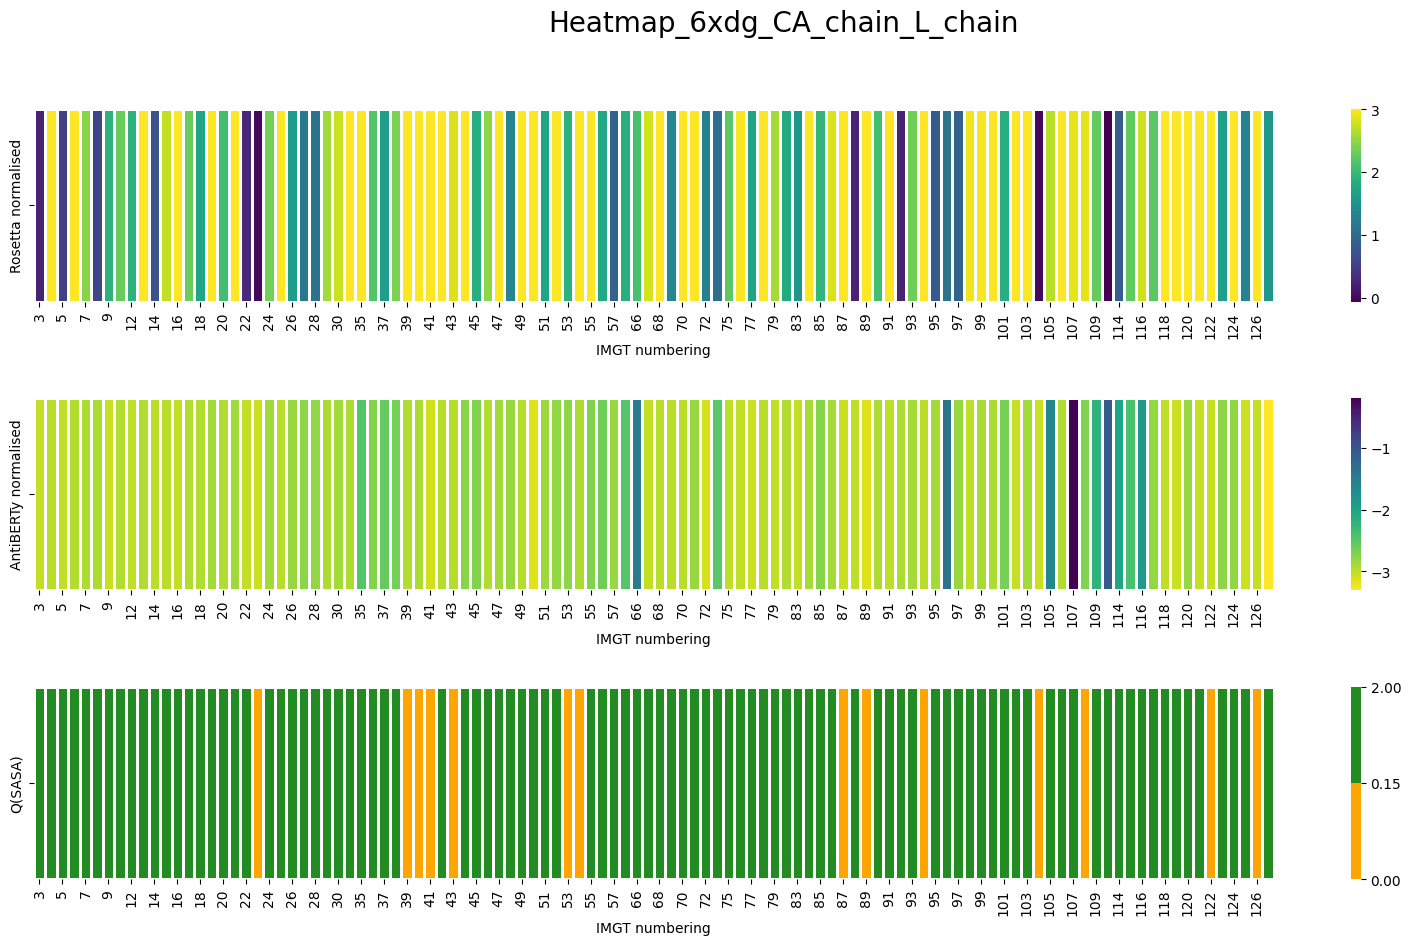

<Figure size 640x480 with 0 Axes>

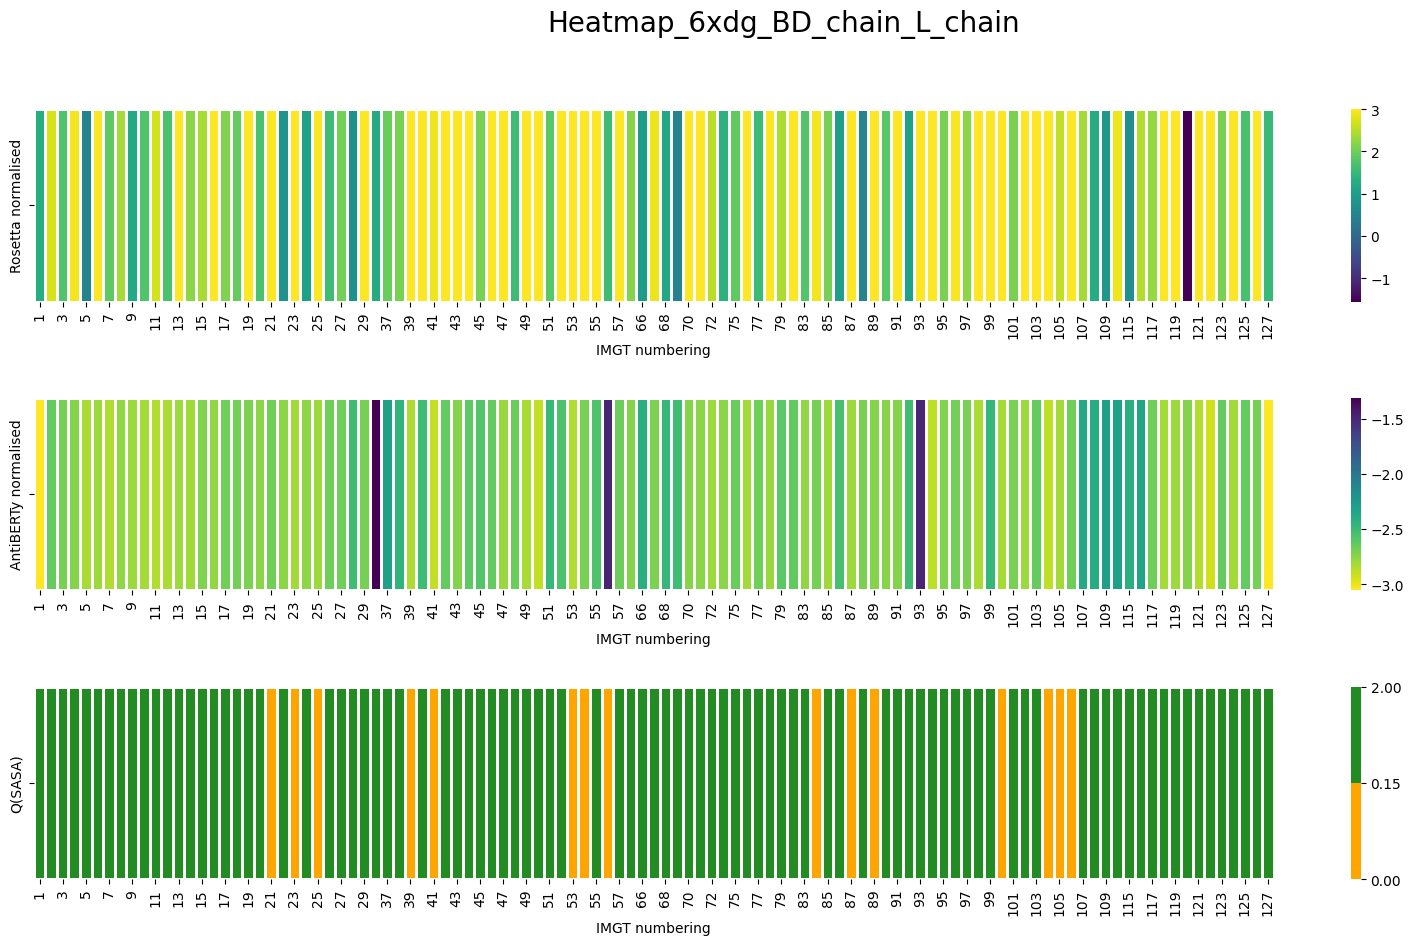

<Figure size 640x480 with 0 Axes>

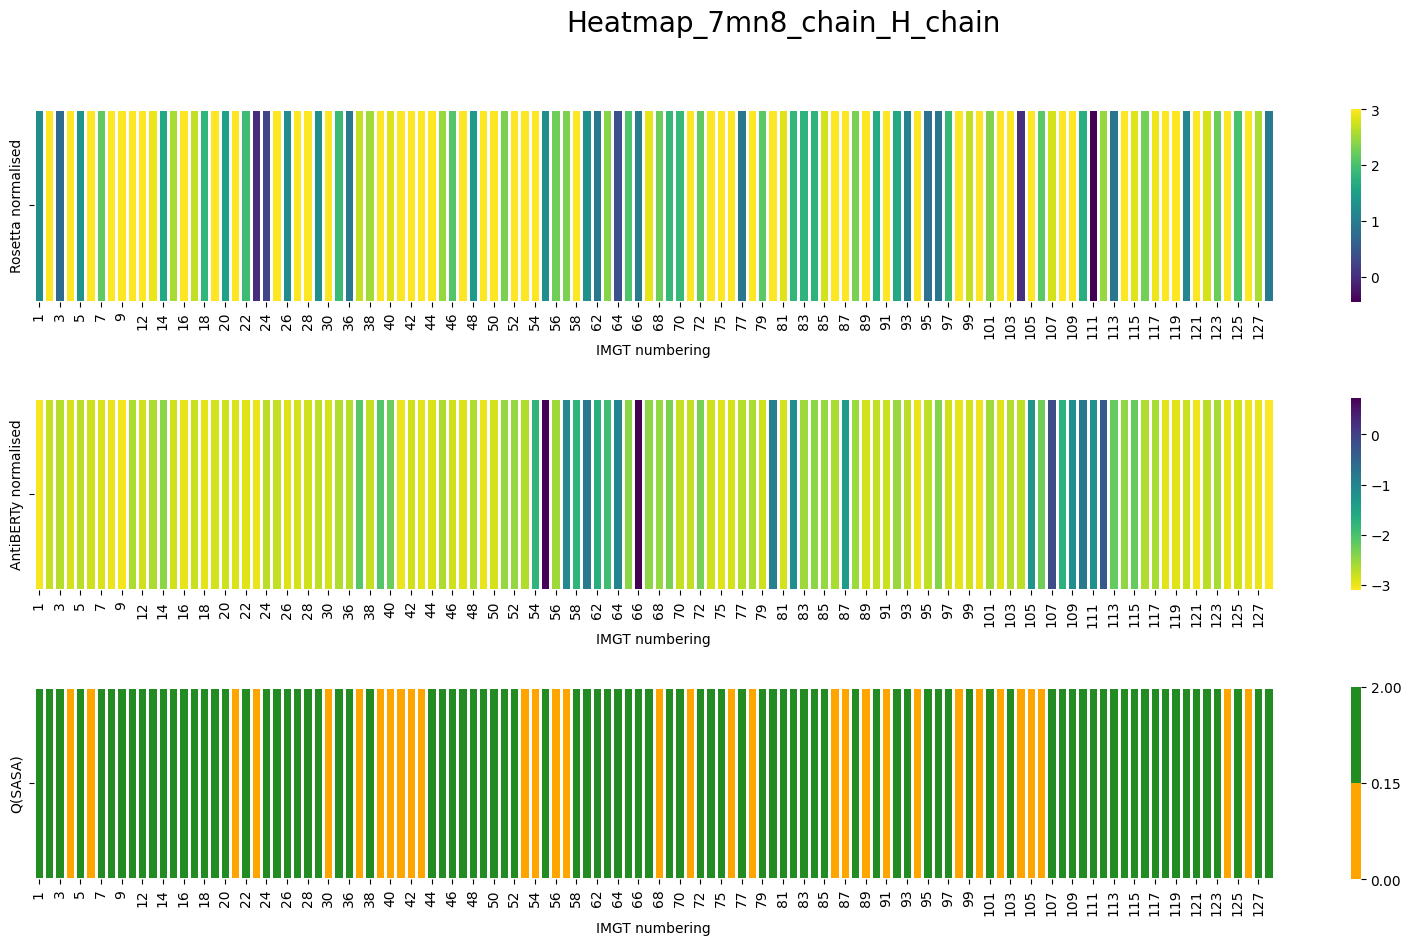

<Figure size 640x480 with 0 Axes>

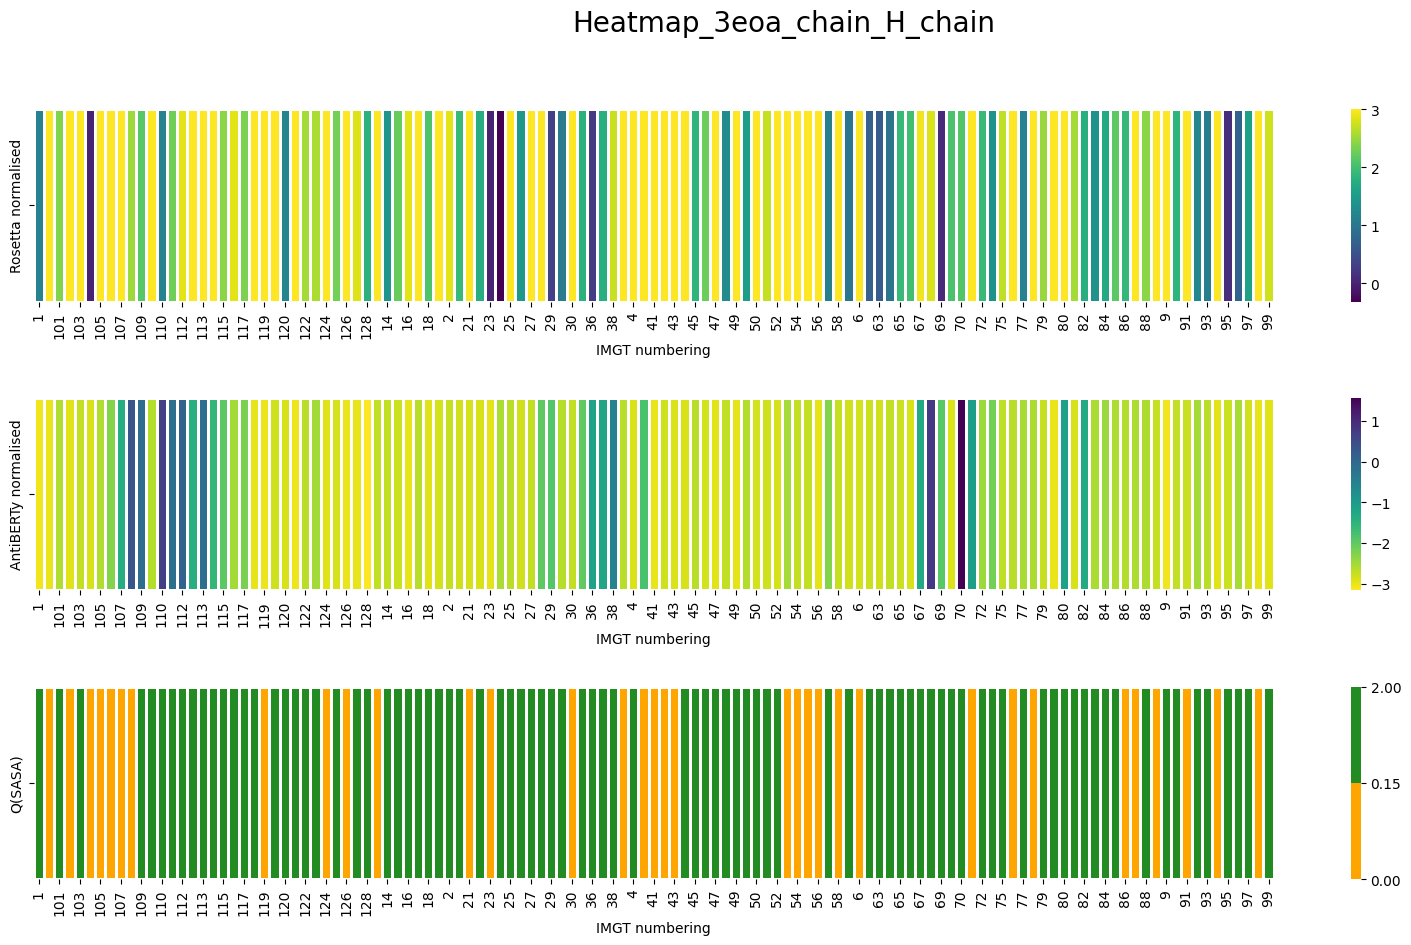

<Figure size 640x480 with 0 Axes>

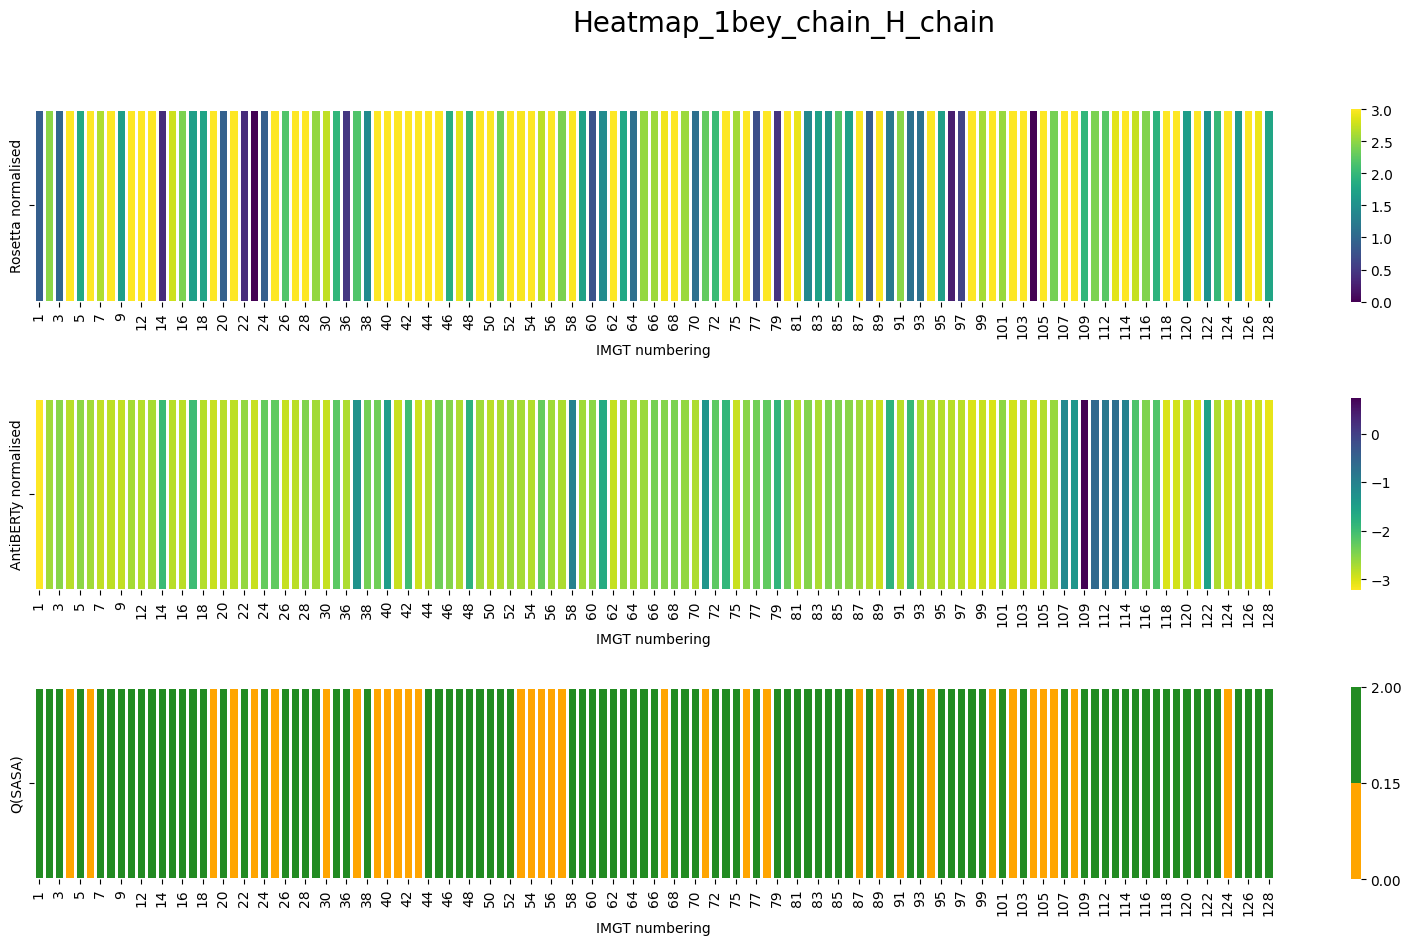

<Figure size 640x480 with 0 Axes>

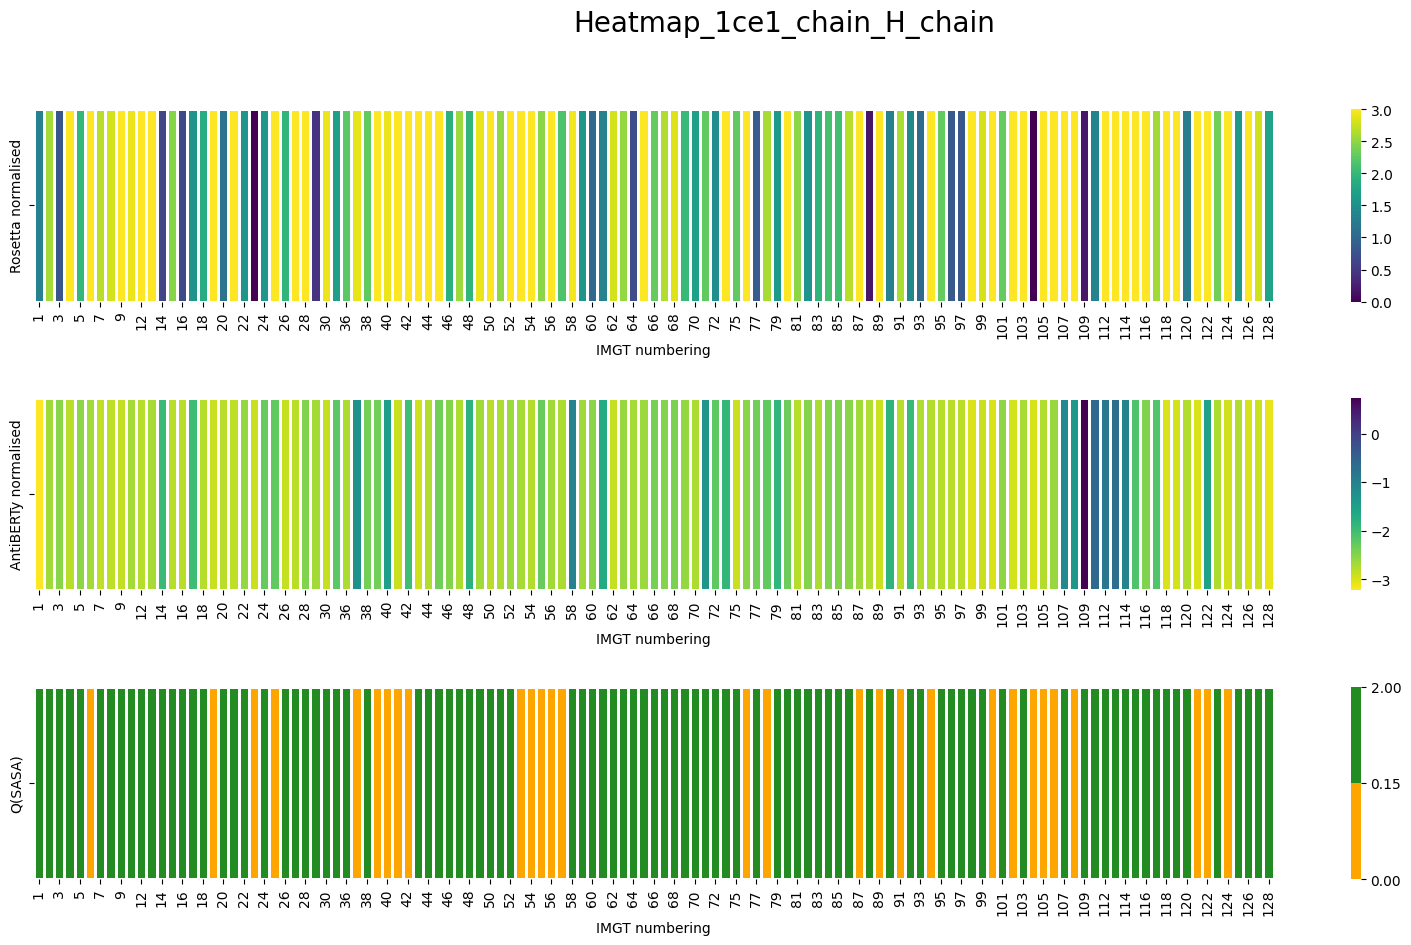

<Figure size 640x480 with 0 Axes>

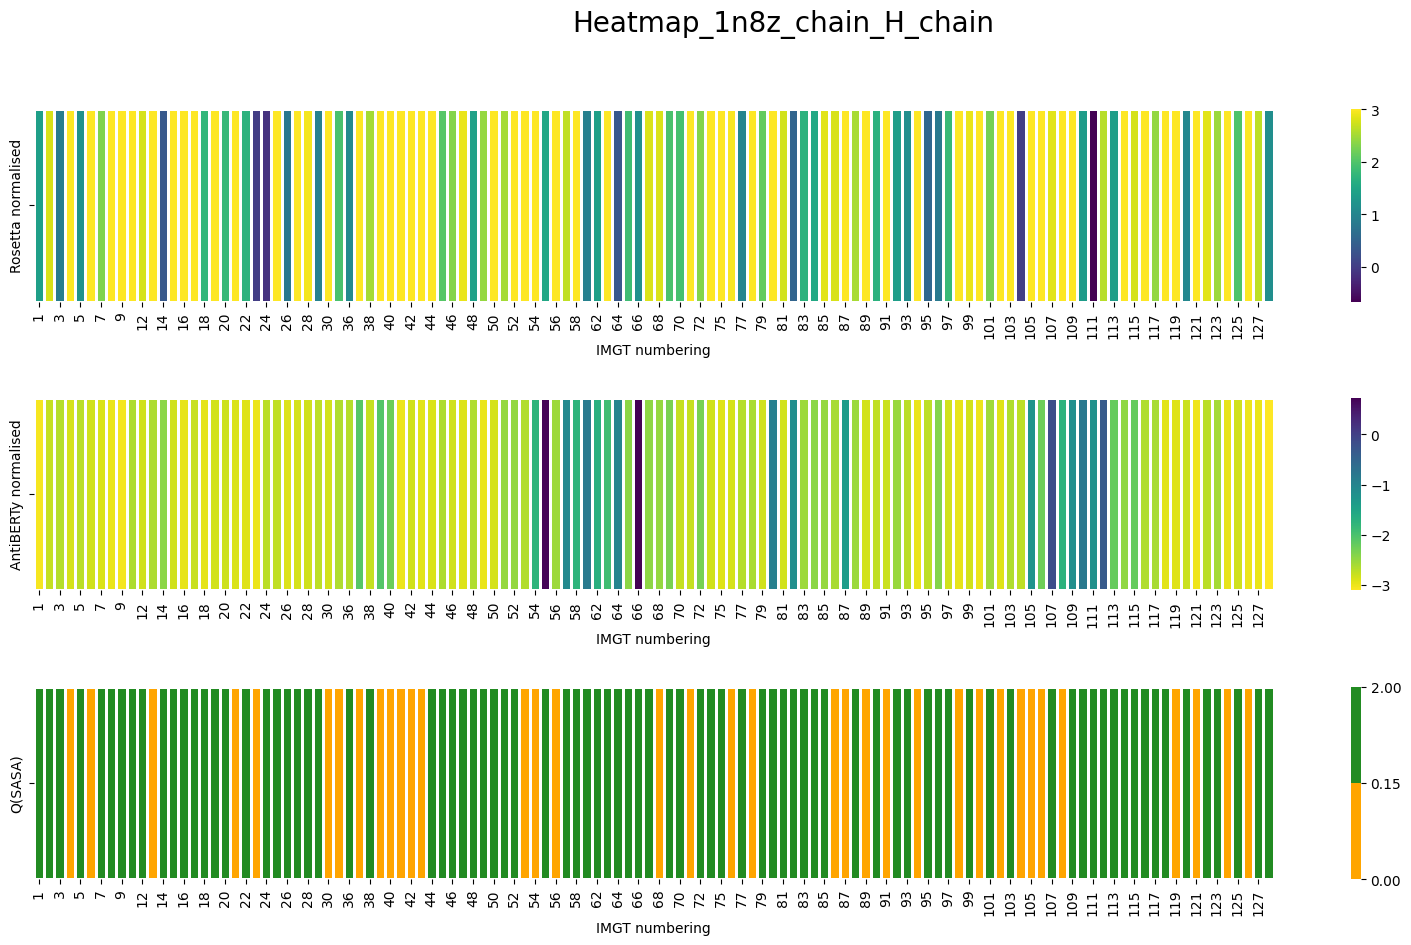

<Figure size 640x480 with 0 Axes>

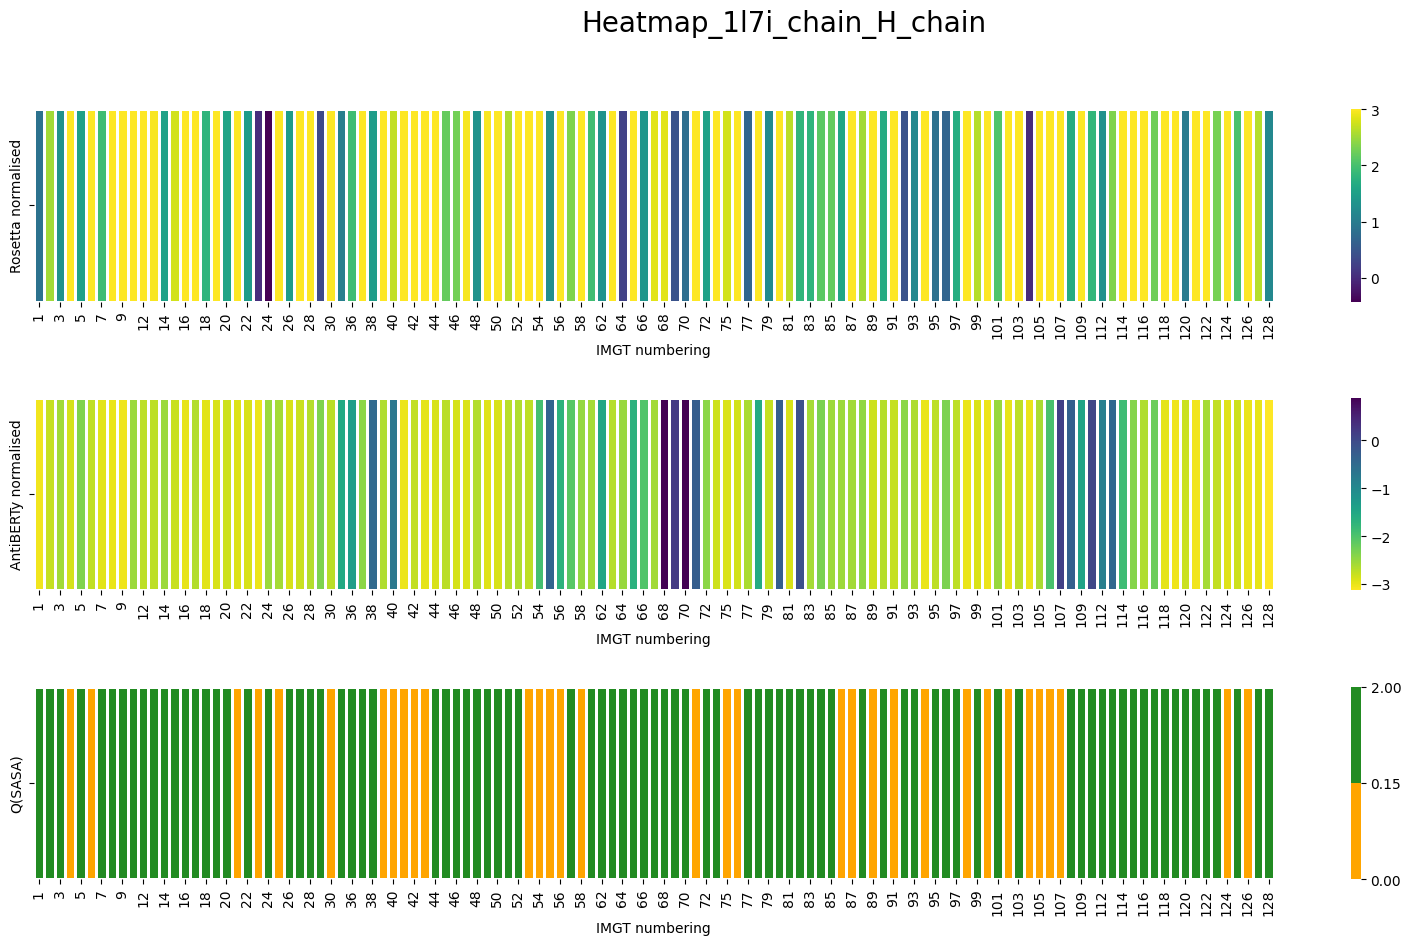

<Figure size 640x480 with 0 Axes>

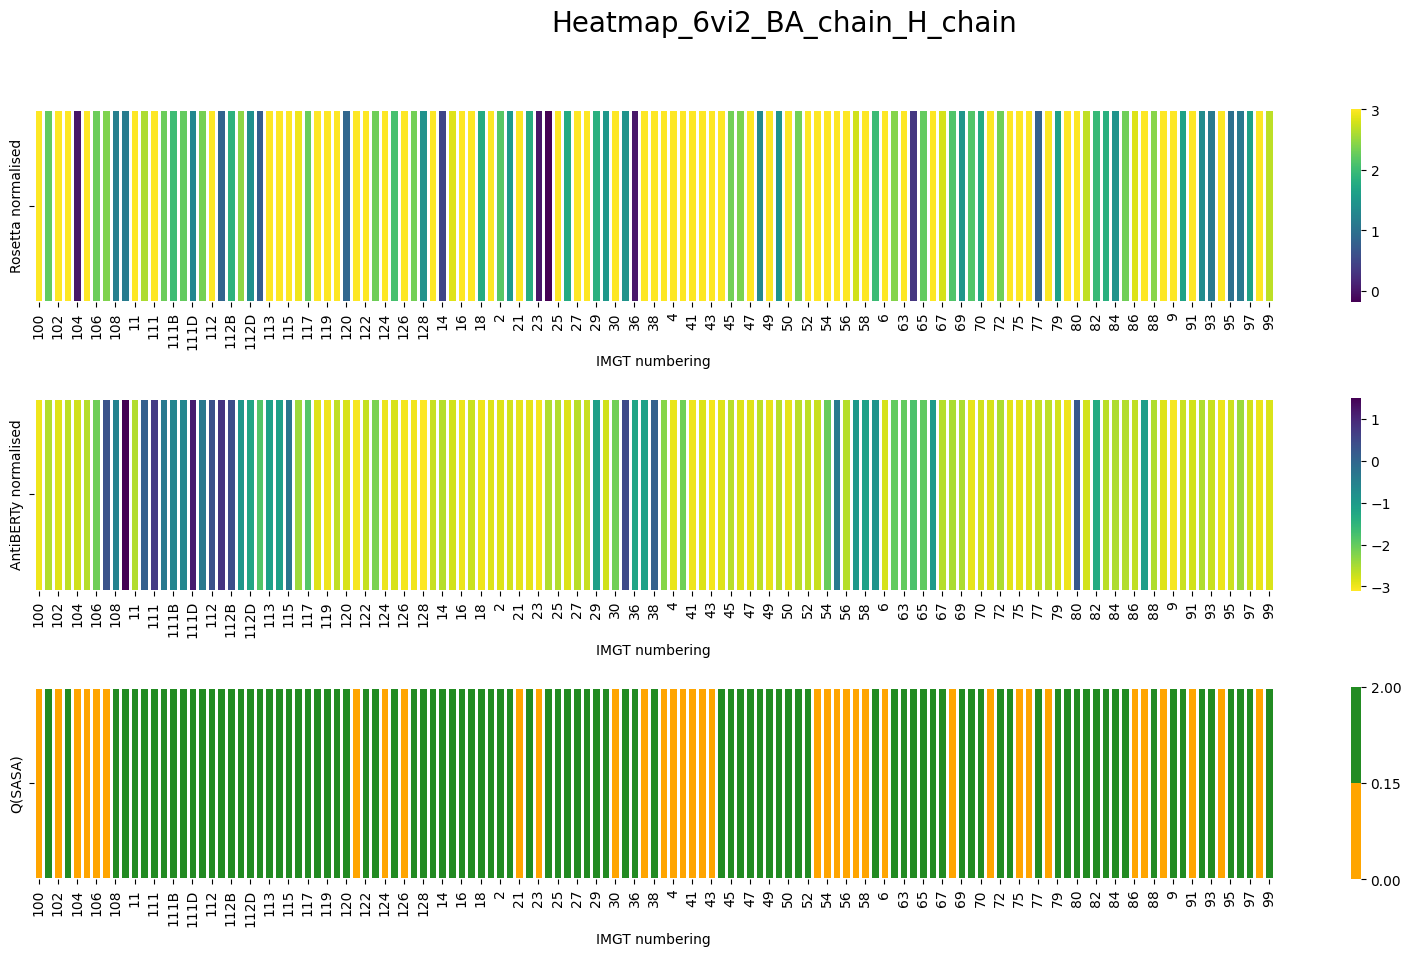

<Figure size 640x480 with 0 Axes>

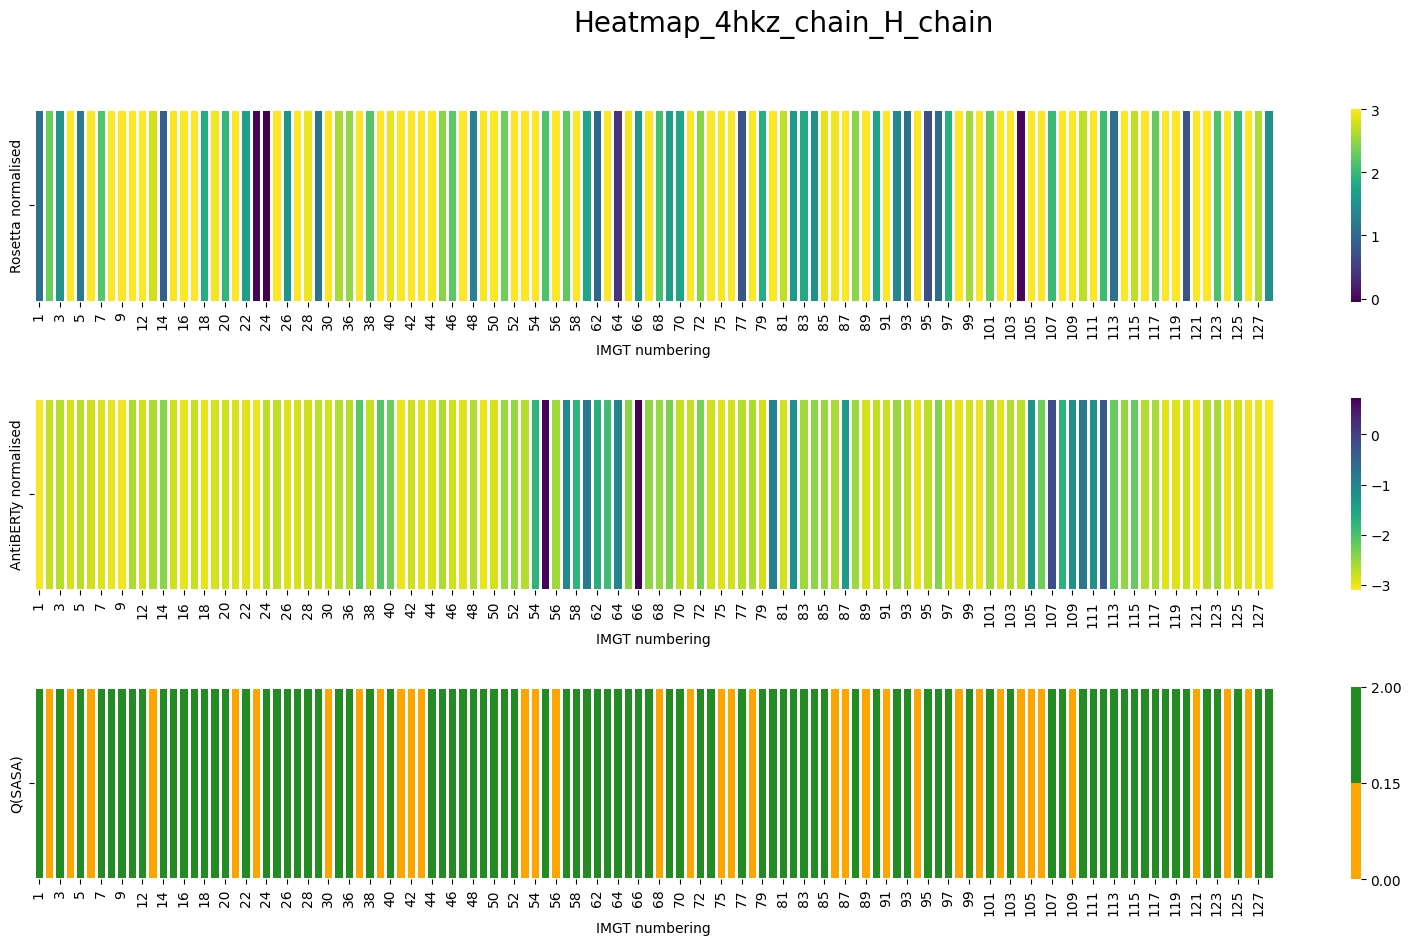

<Figure size 640x480 with 0 Axes>

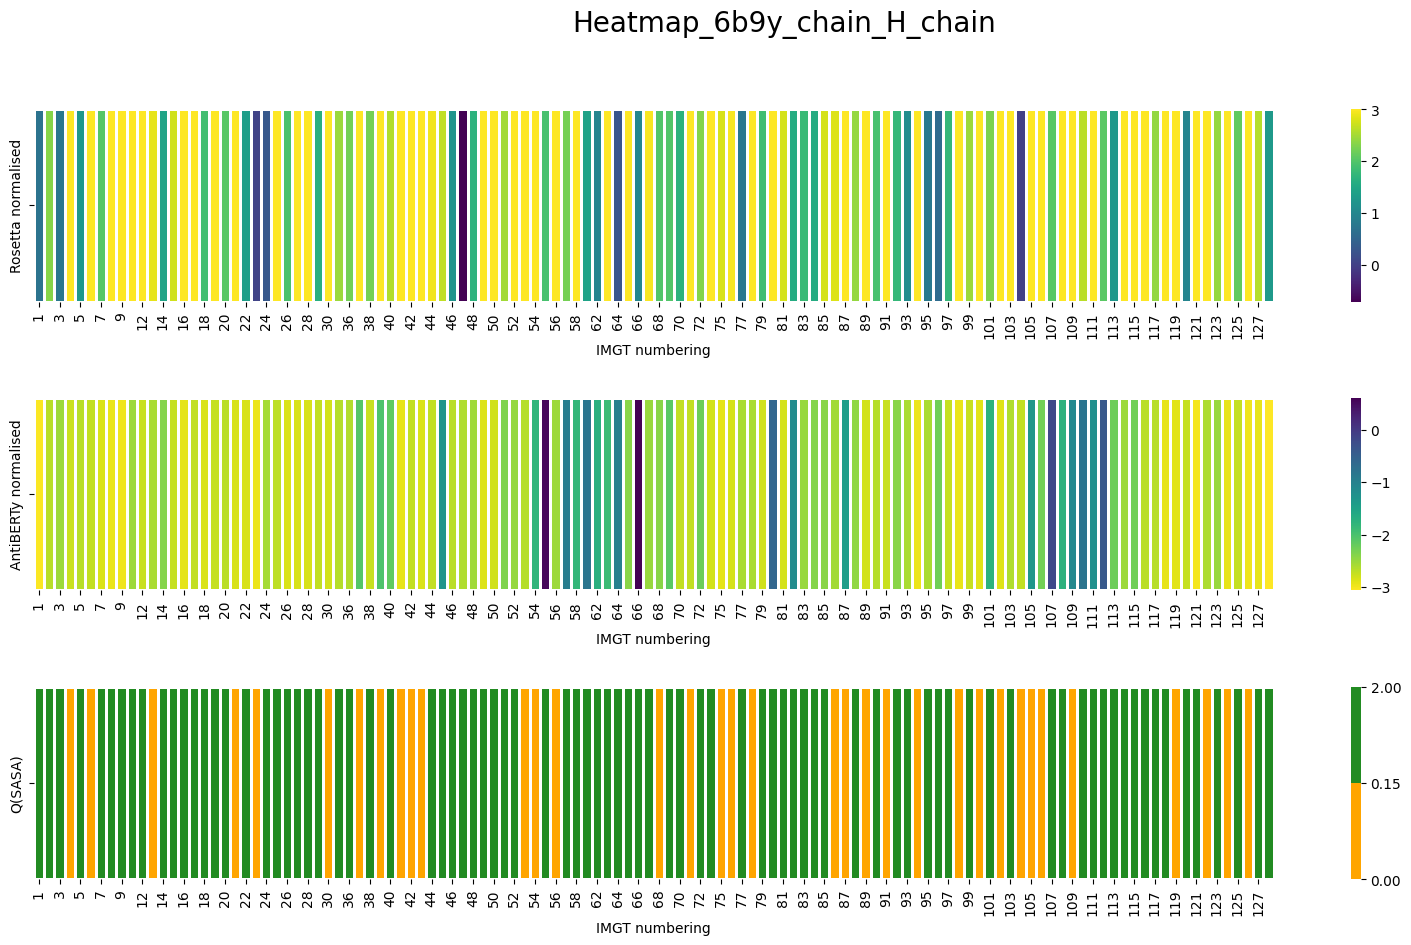

<Figure size 640x480 with 0 Axes>

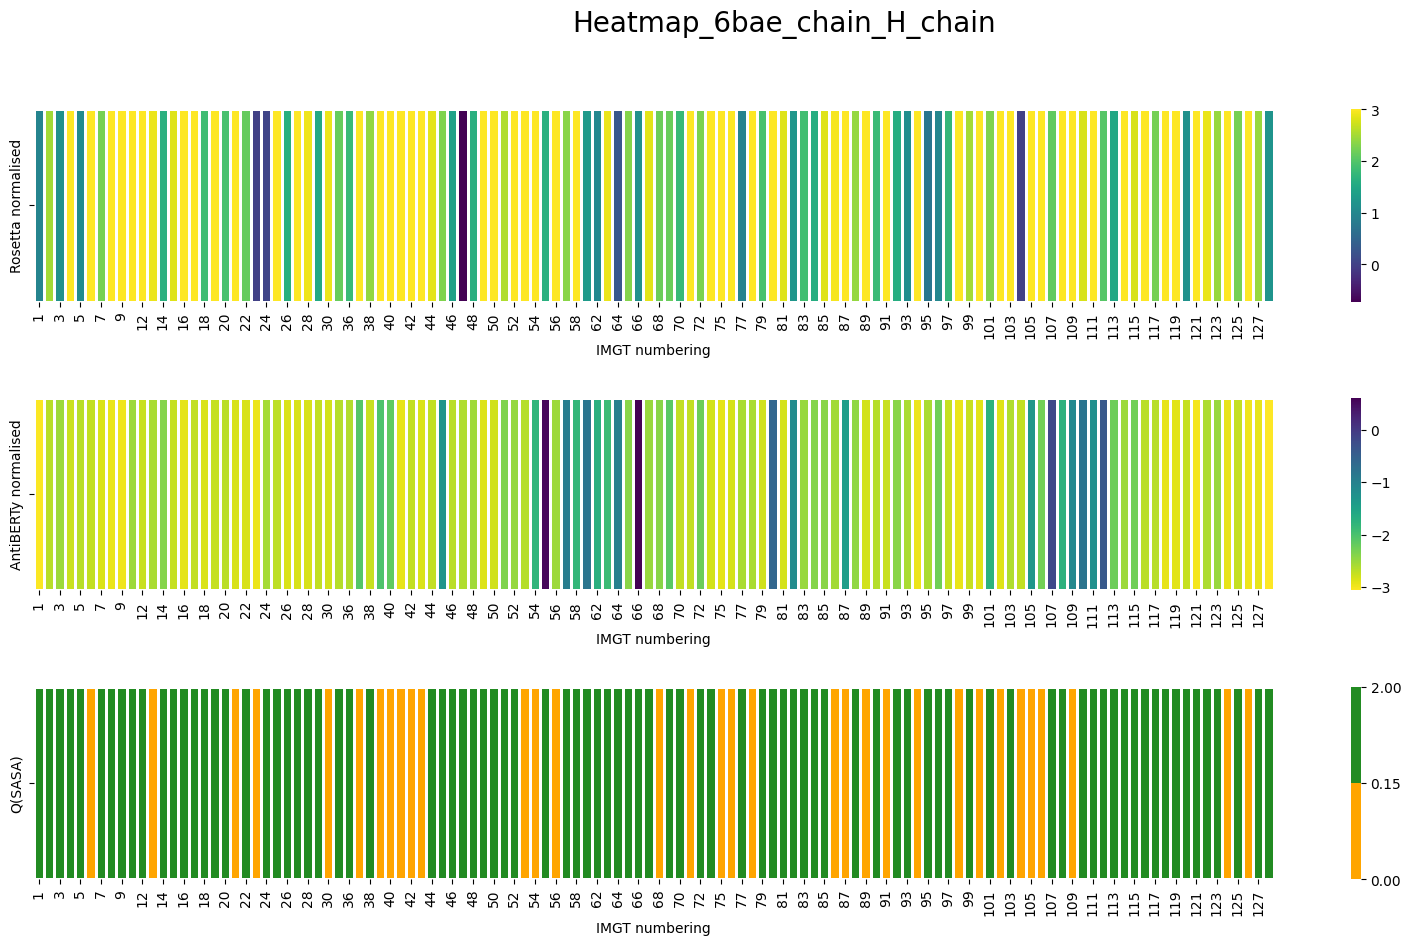

<Figure size 640x480 with 0 Axes>

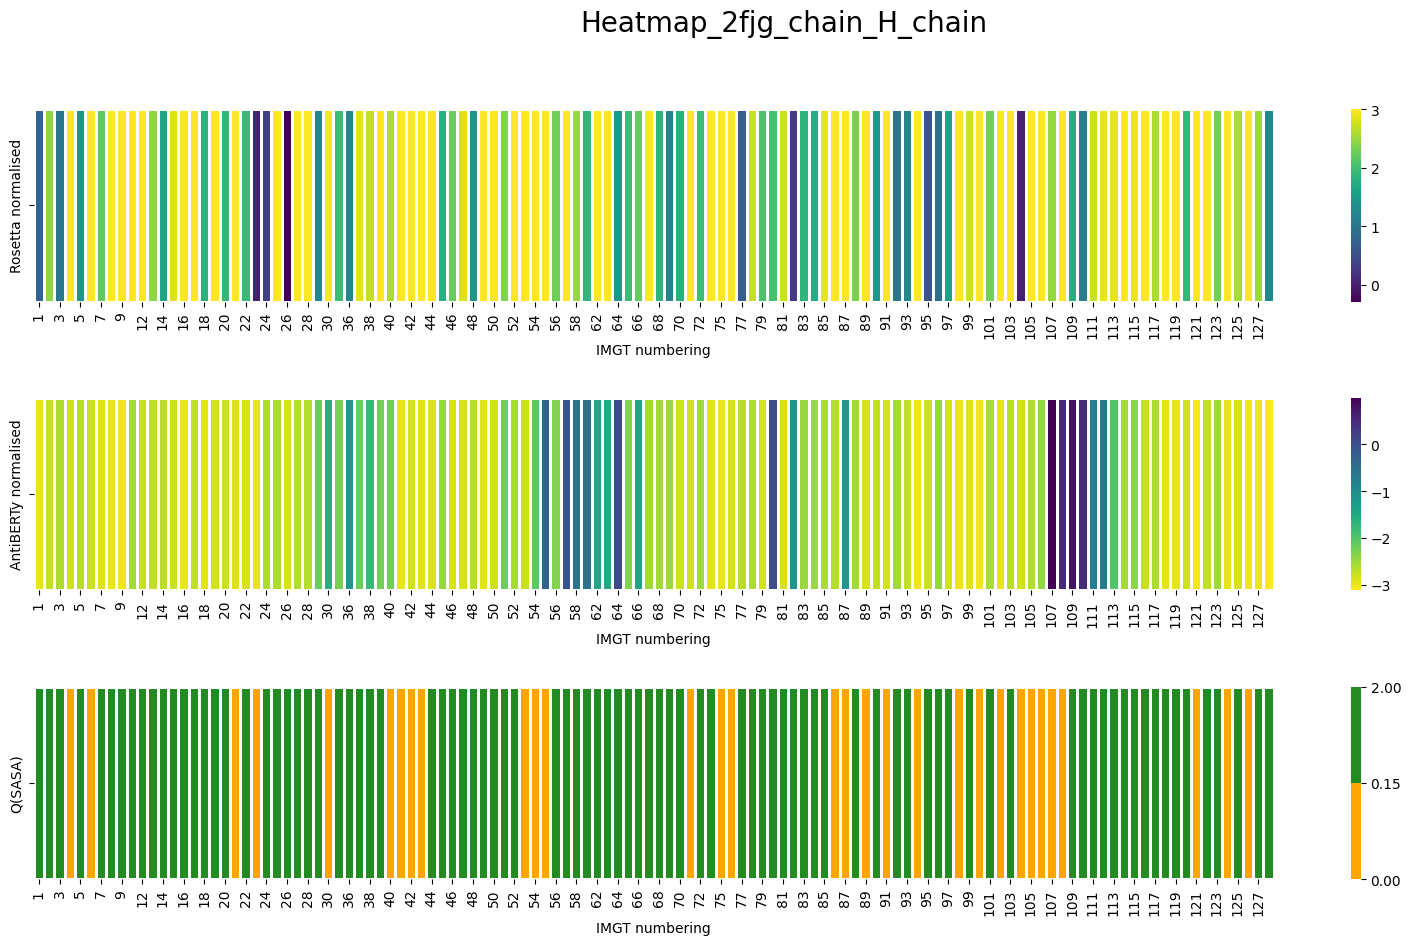

<Figure size 640x480 with 0 Axes>

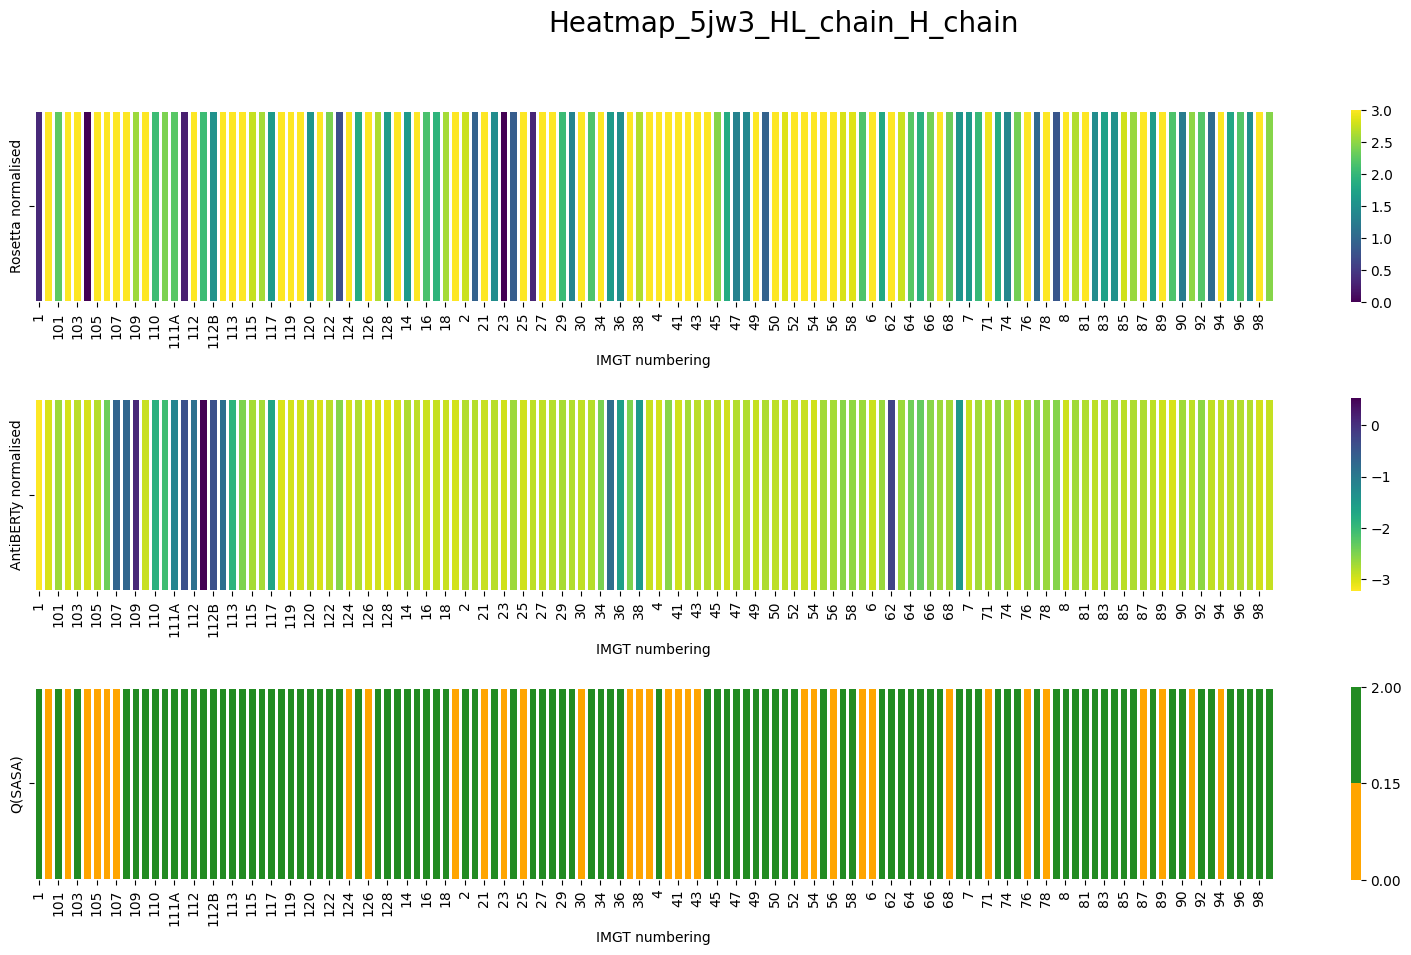

<Figure size 640x480 with 0 Axes>

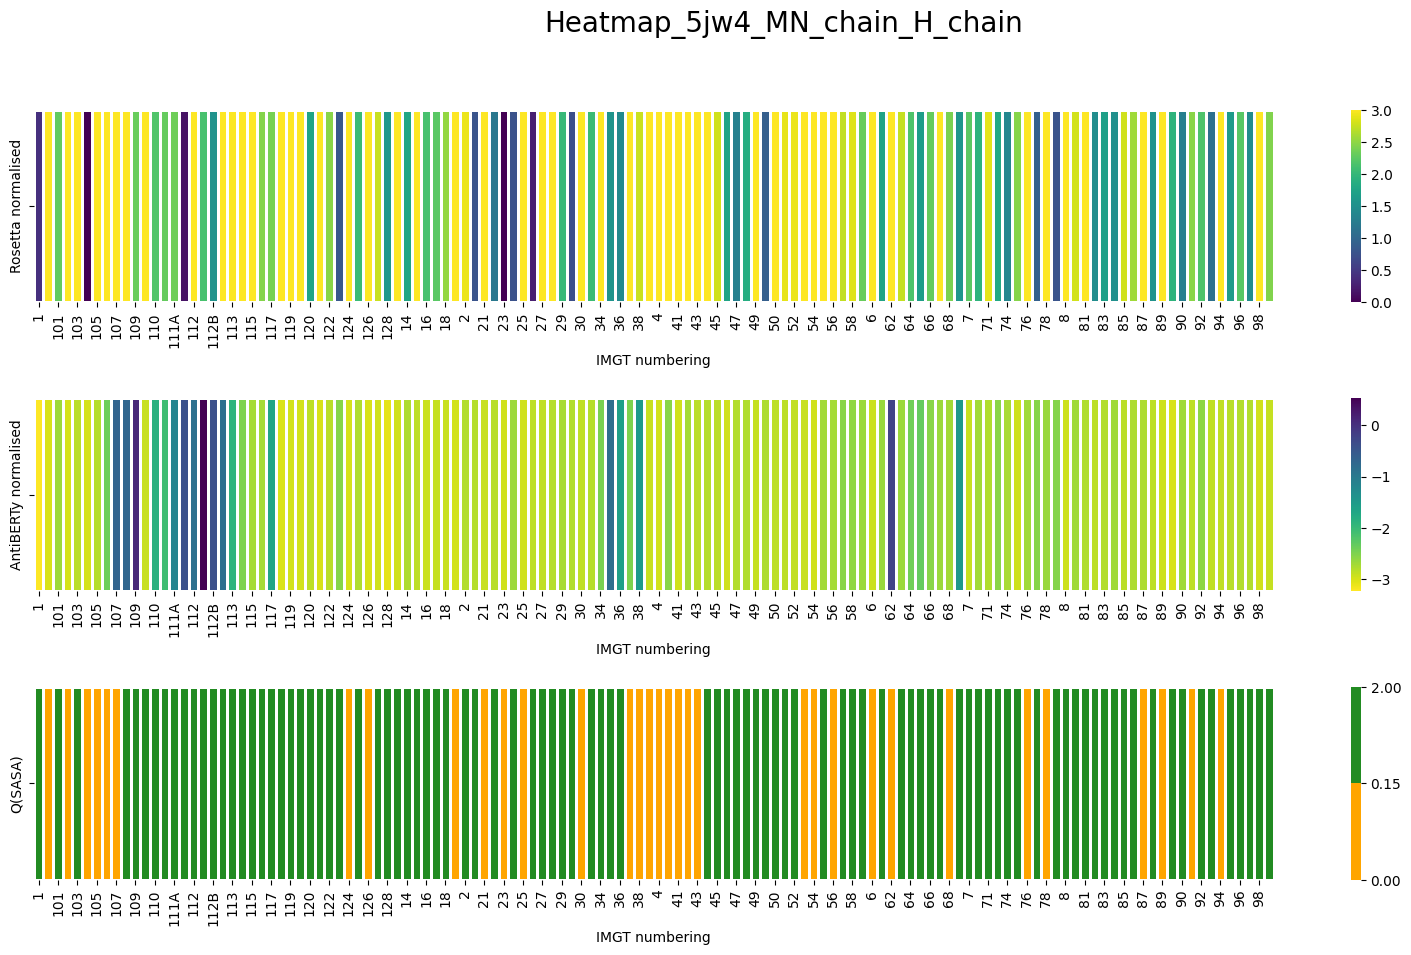

<Figure size 640x480 with 0 Axes>

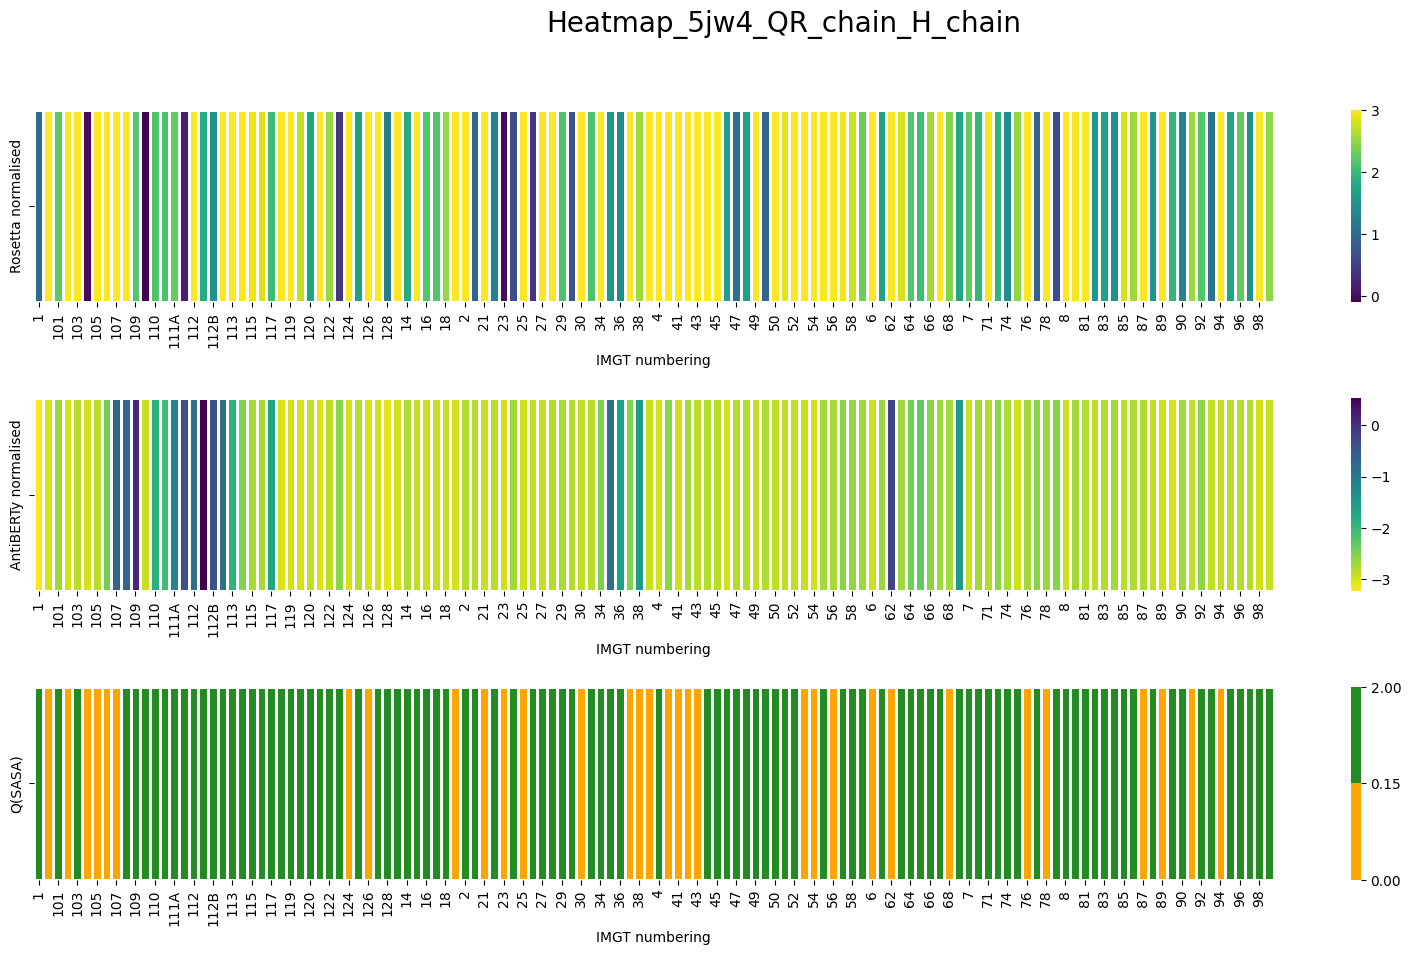

<Figure size 640x480 with 0 Axes>

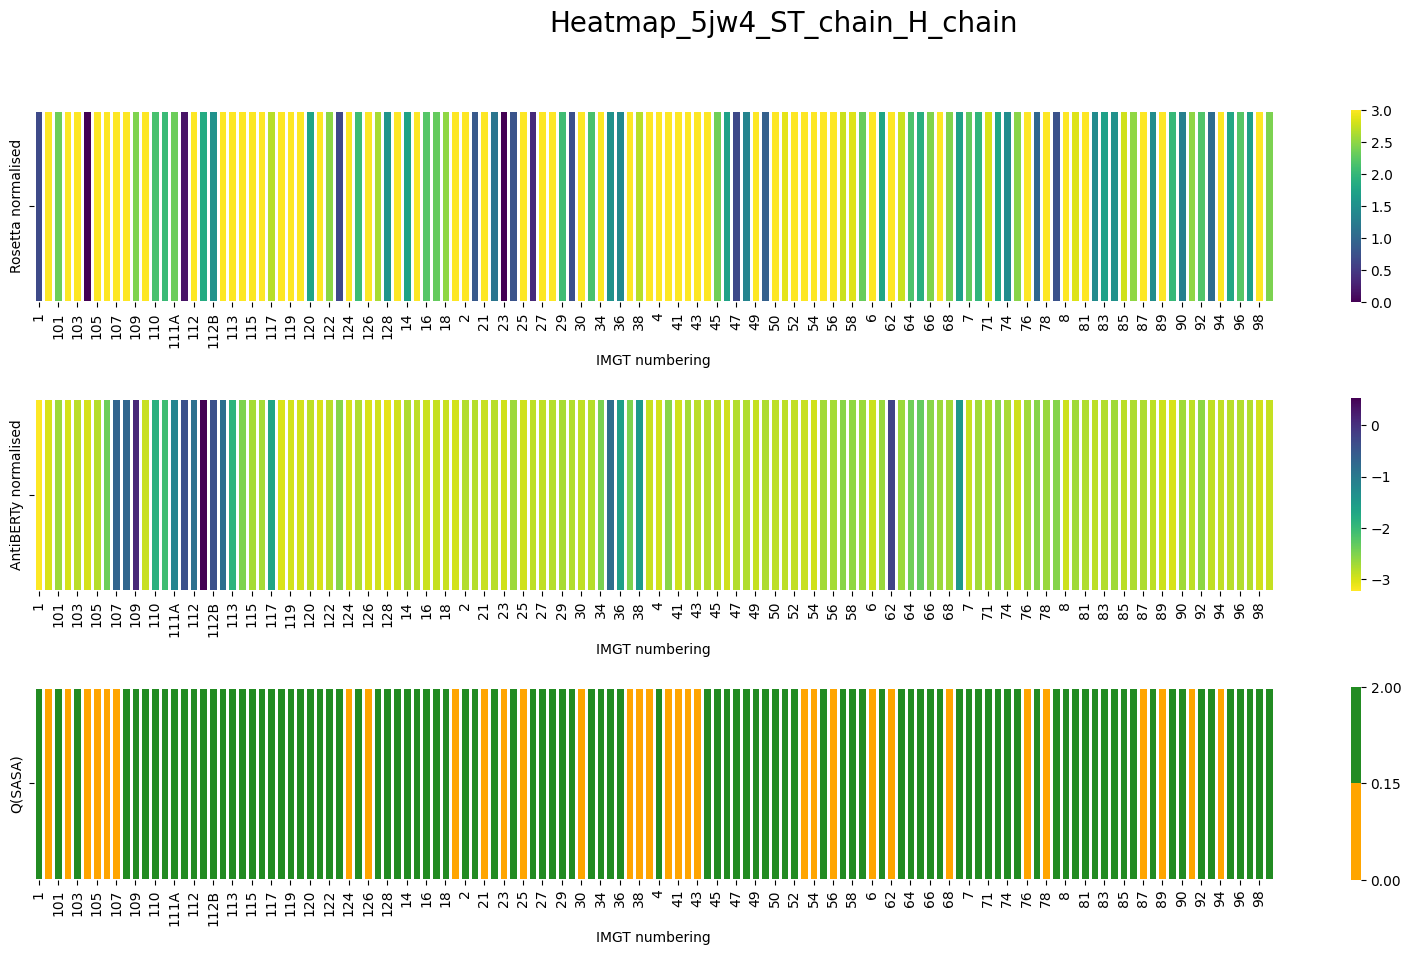

<Figure size 640x480 with 0 Axes>

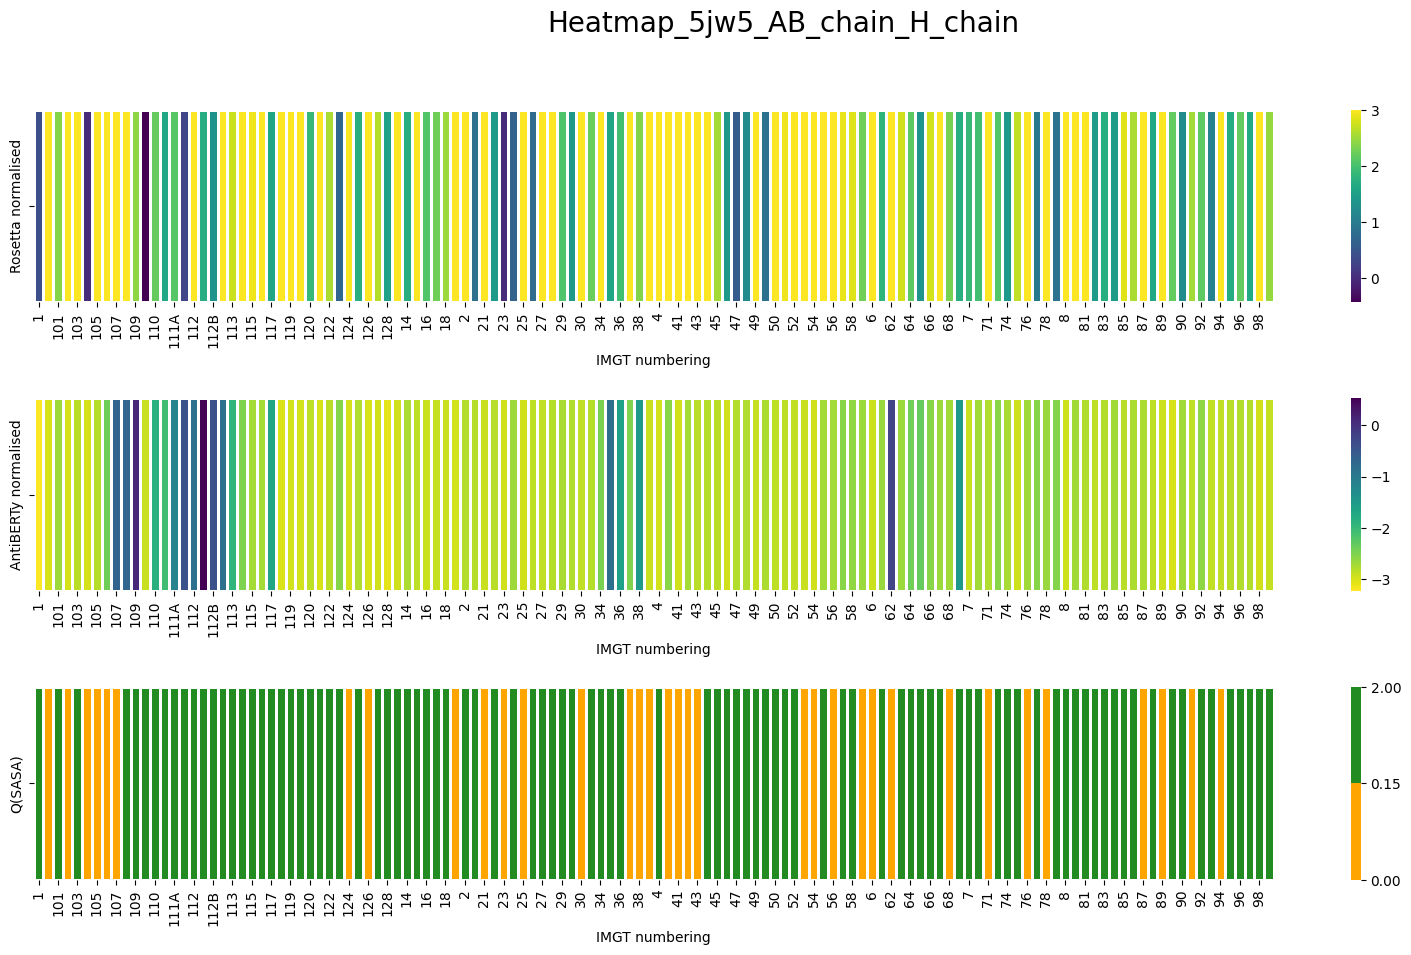

<Figure size 640x480 with 0 Axes>

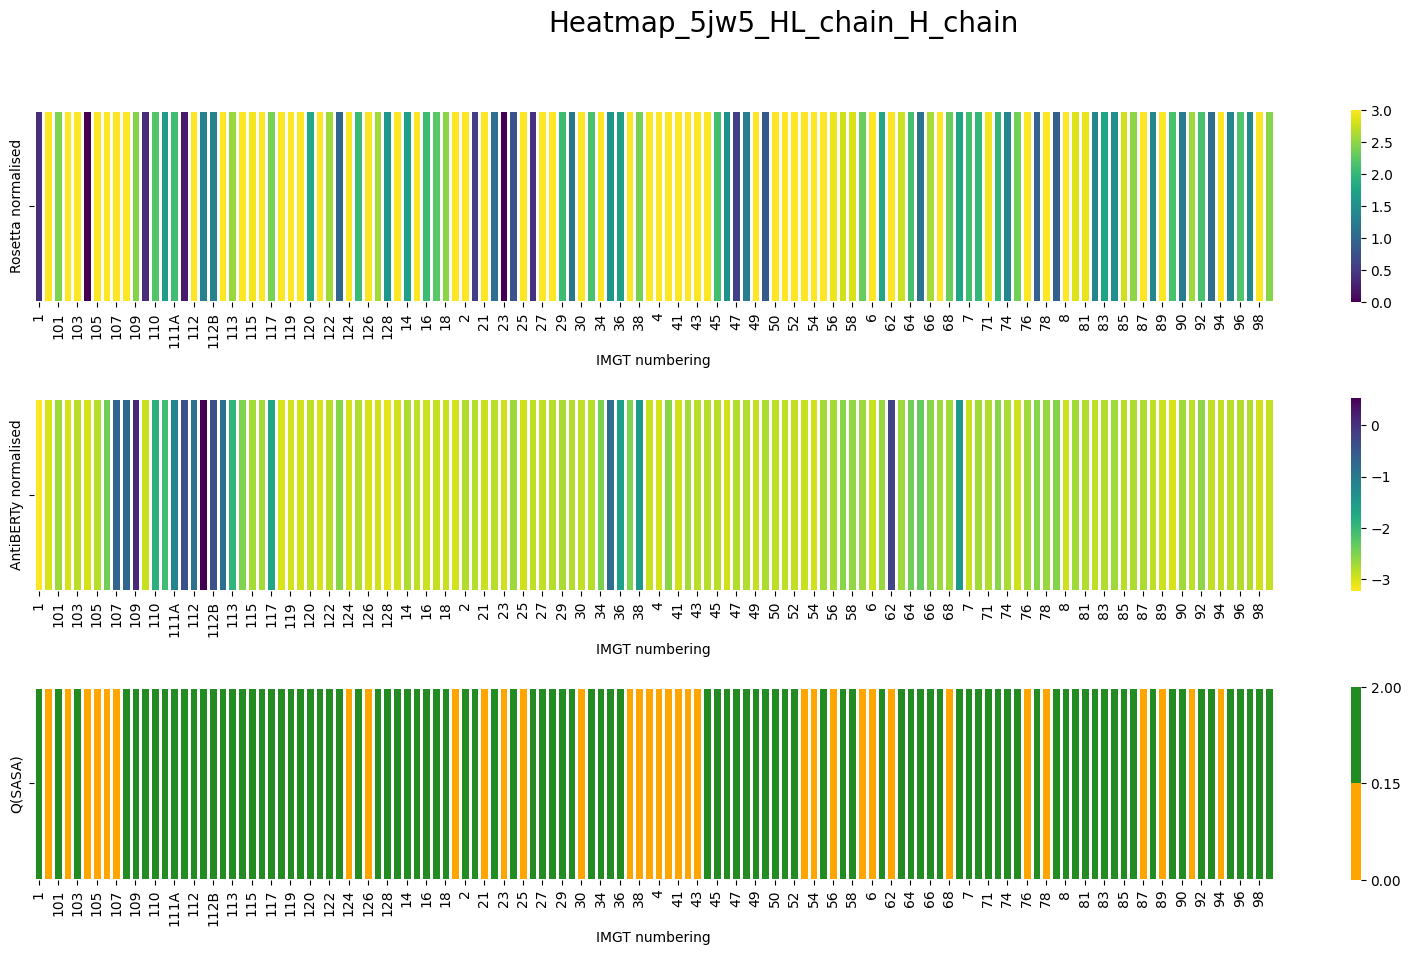

<Figure size 640x480 with 0 Axes>

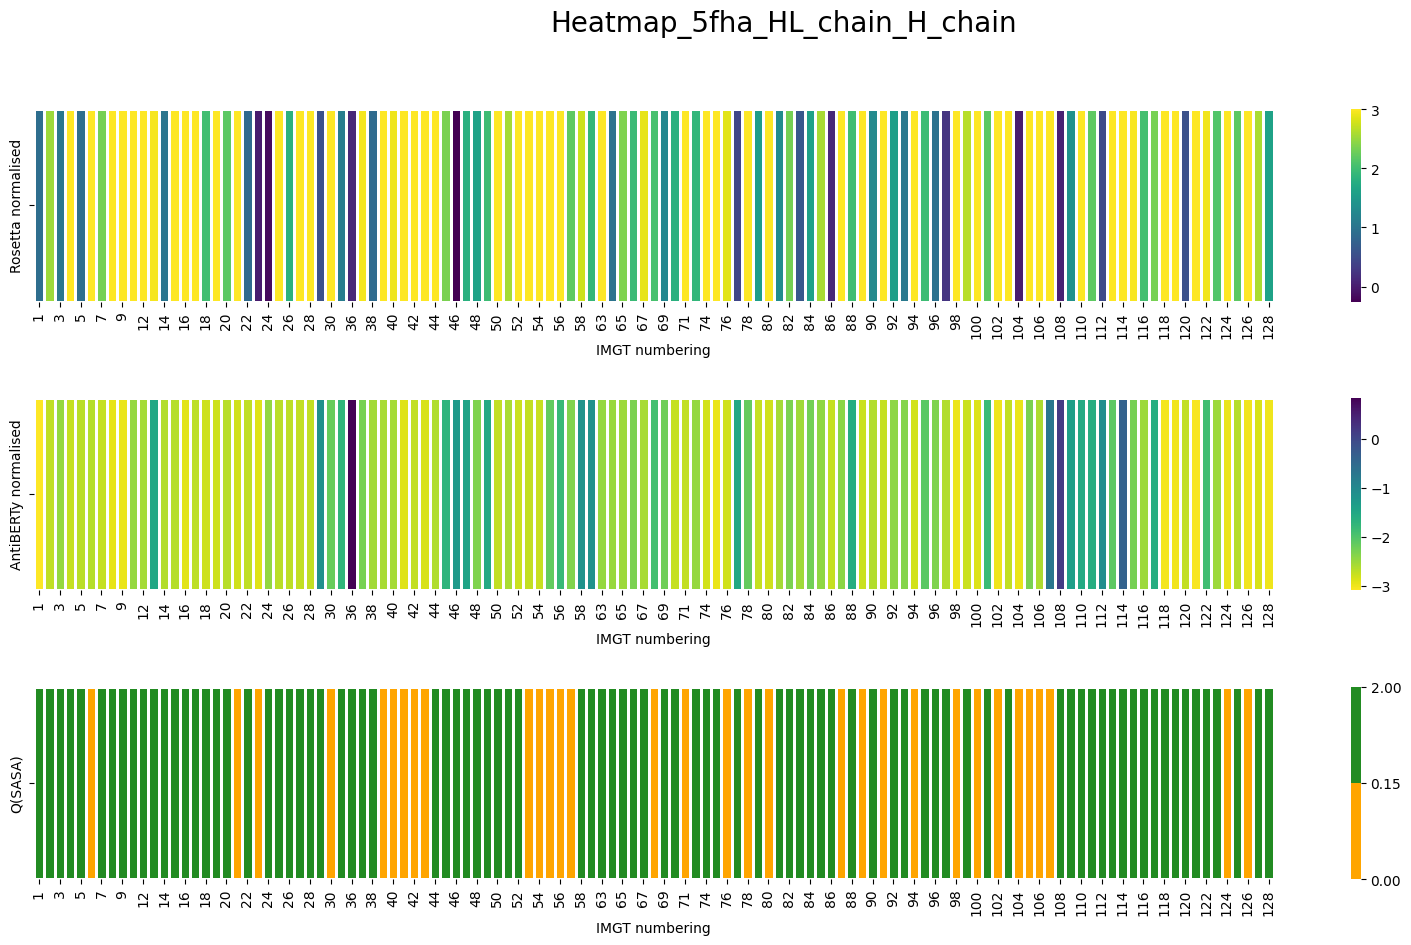

<Figure size 640x480 with 0 Axes>

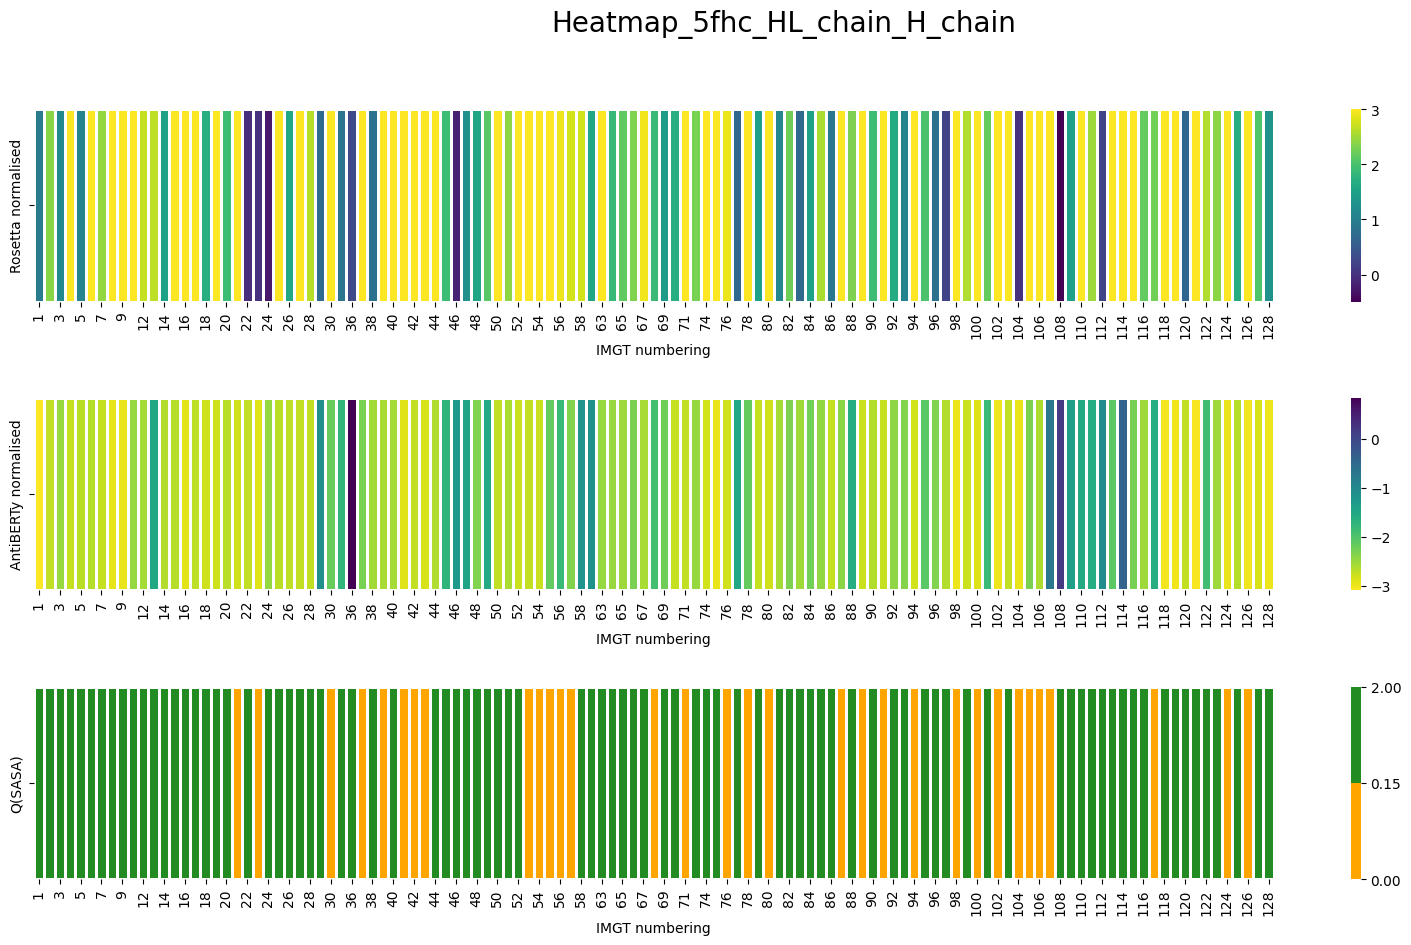

<Figure size 640x480 with 0 Axes>

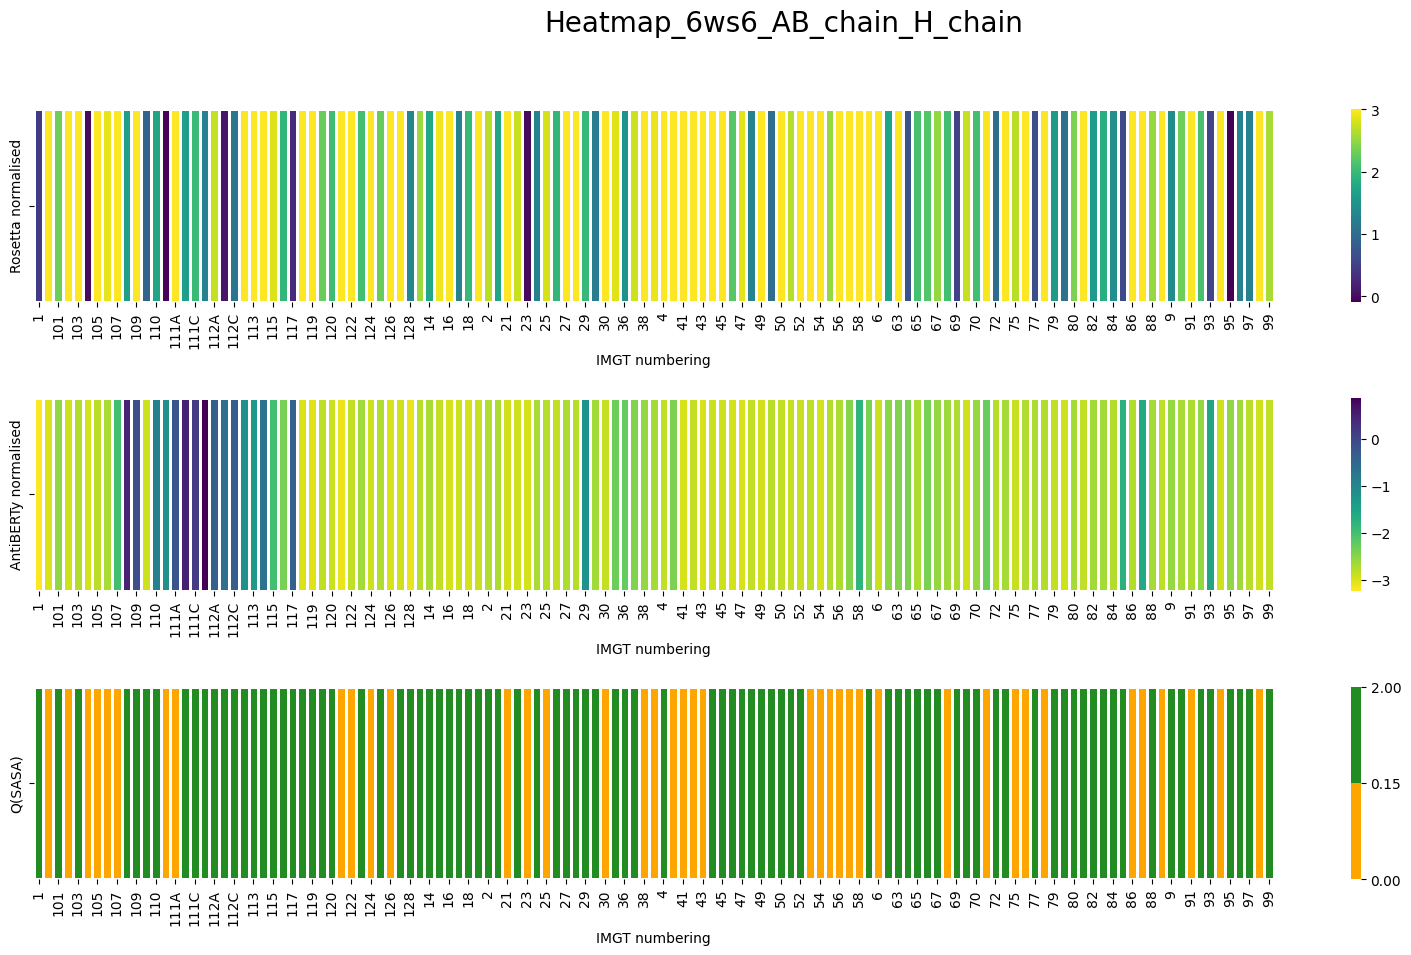

<Figure size 640x480 with 0 Axes>

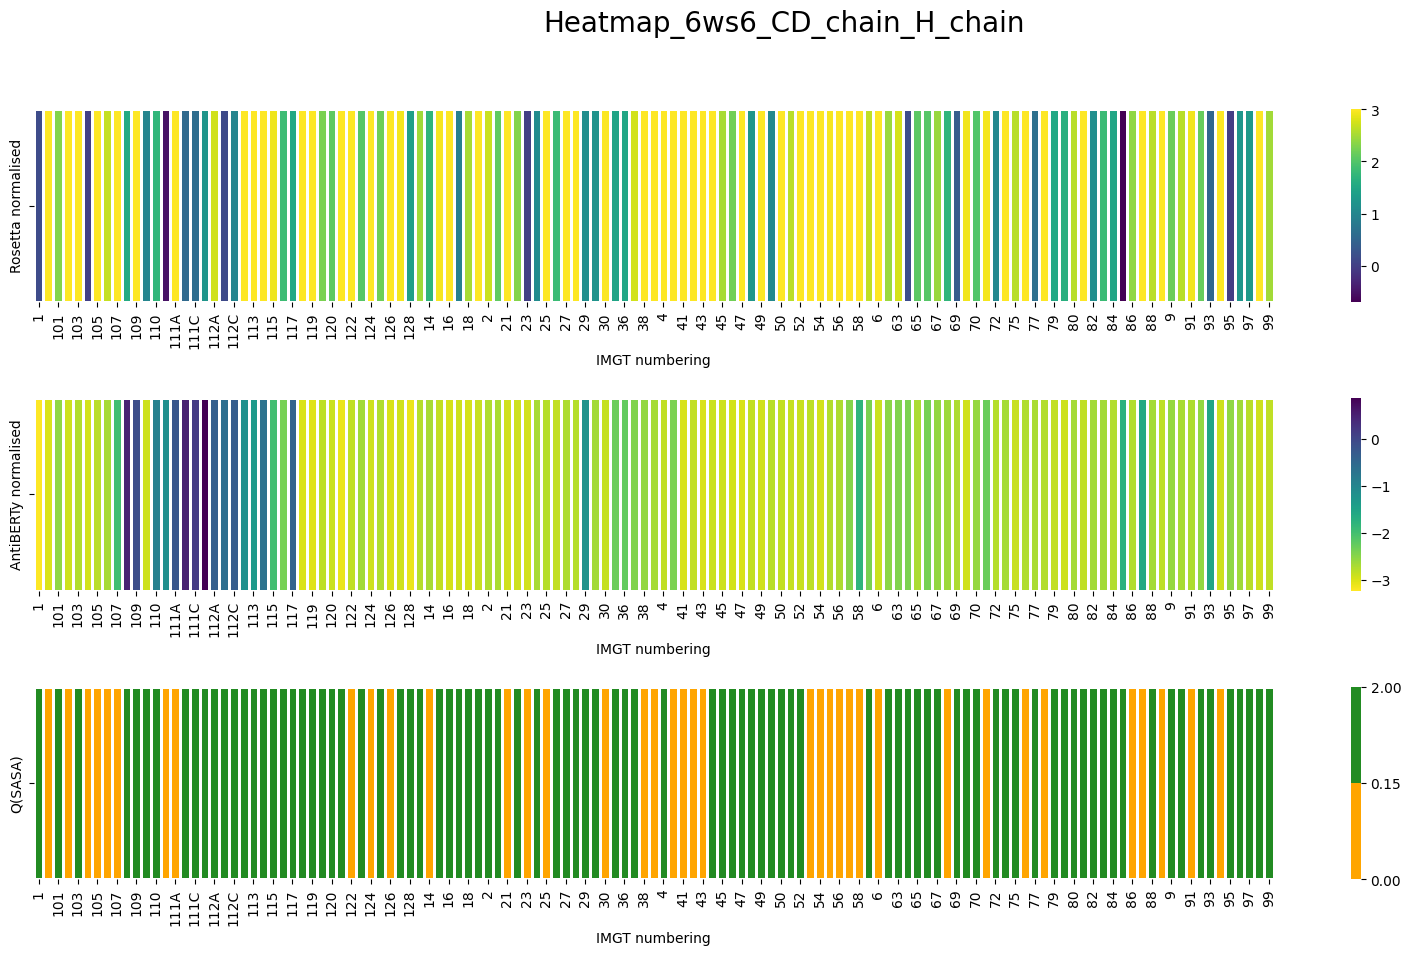

<Figure size 640x480 with 0 Axes>

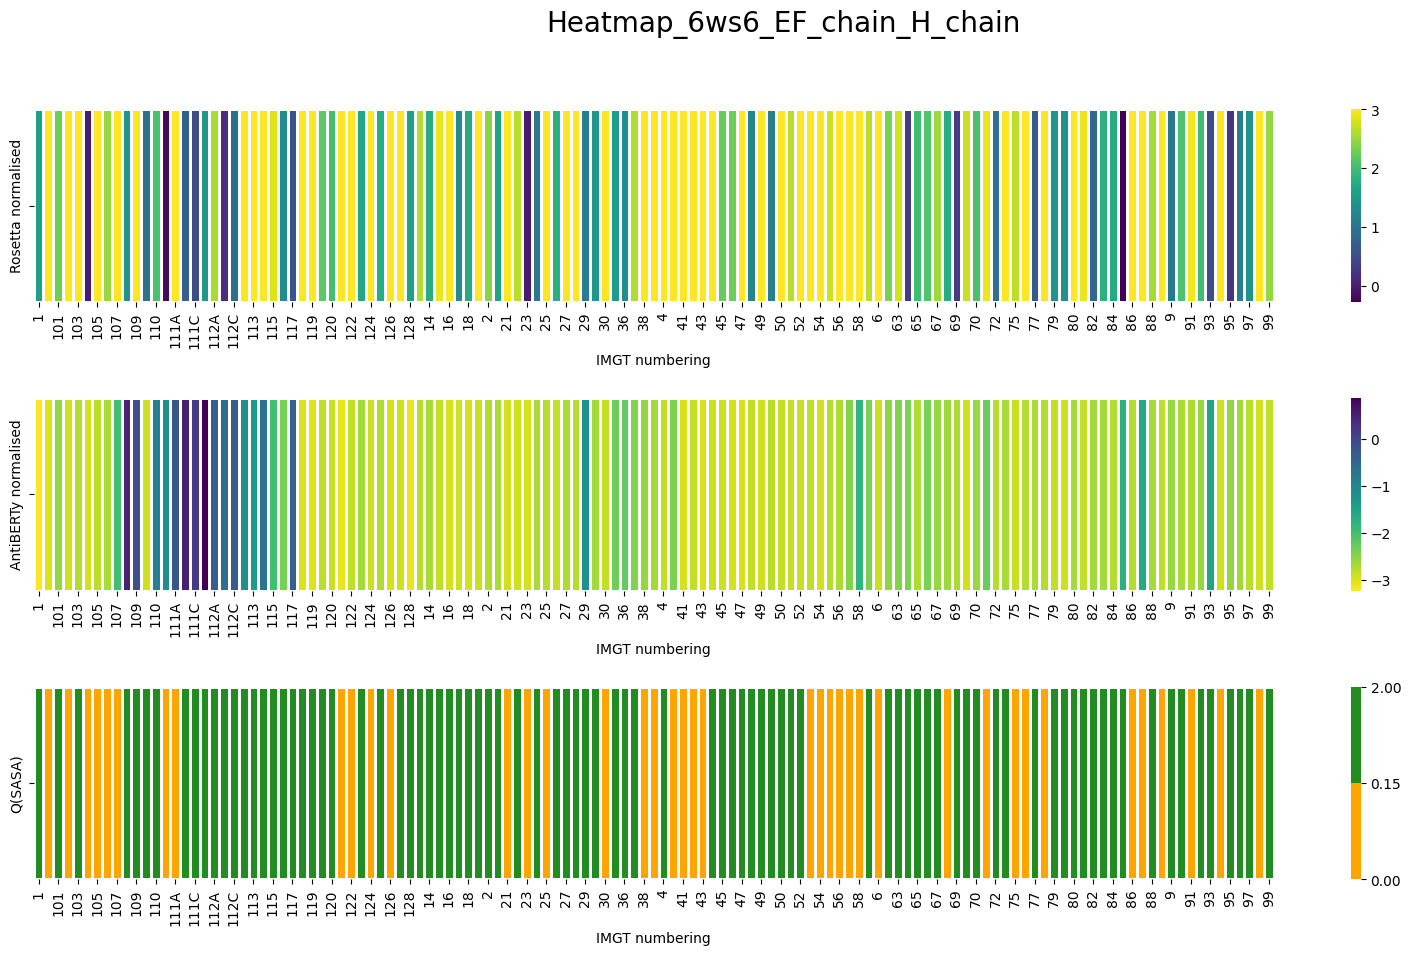

<Figure size 640x480 with 0 Axes>

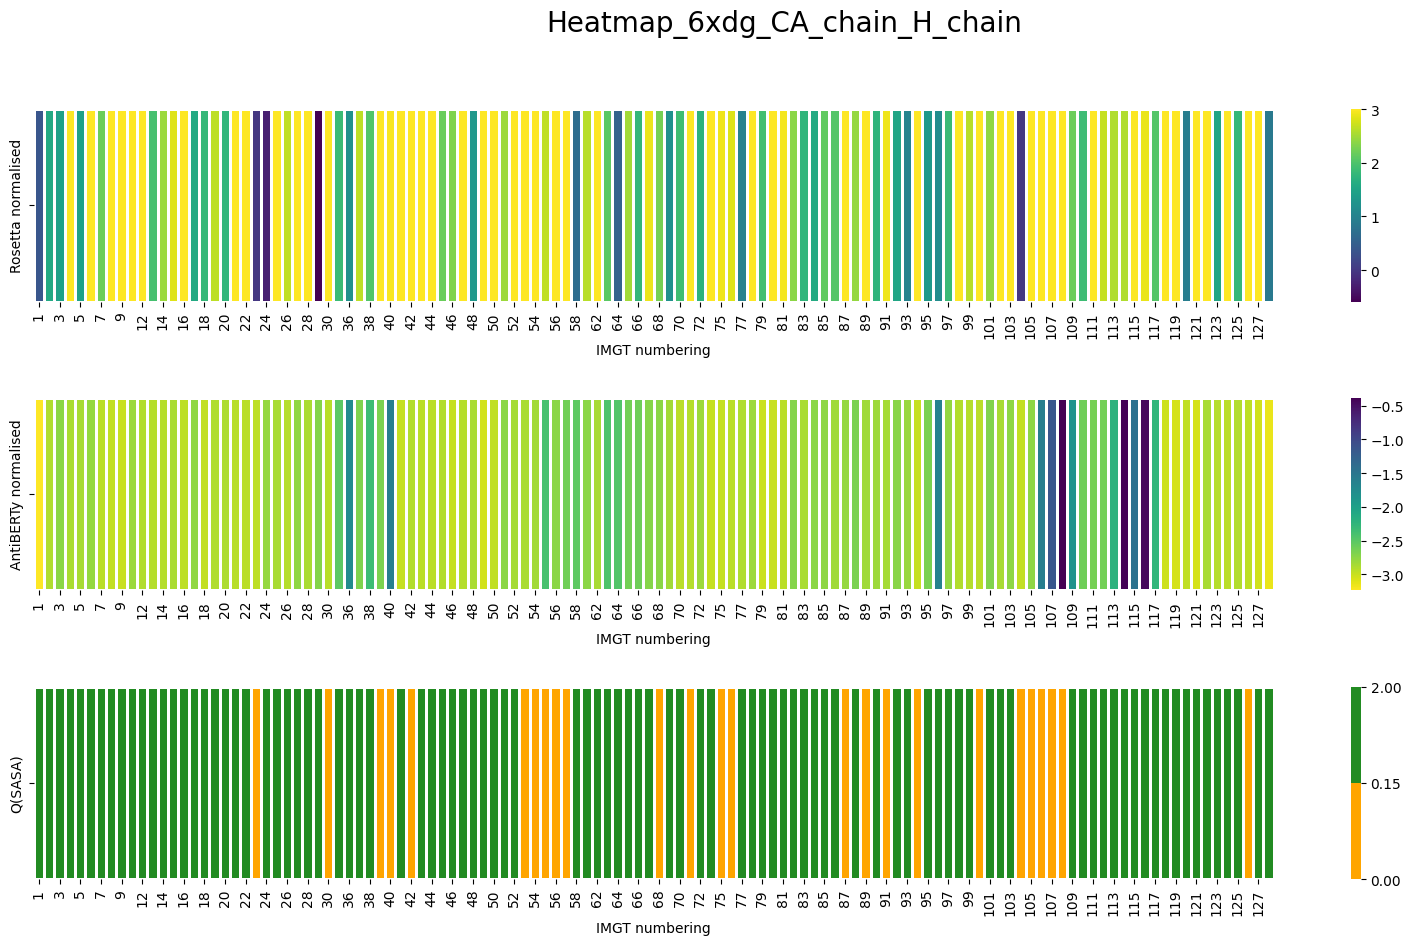

<Figure size 640x480 with 0 Axes>

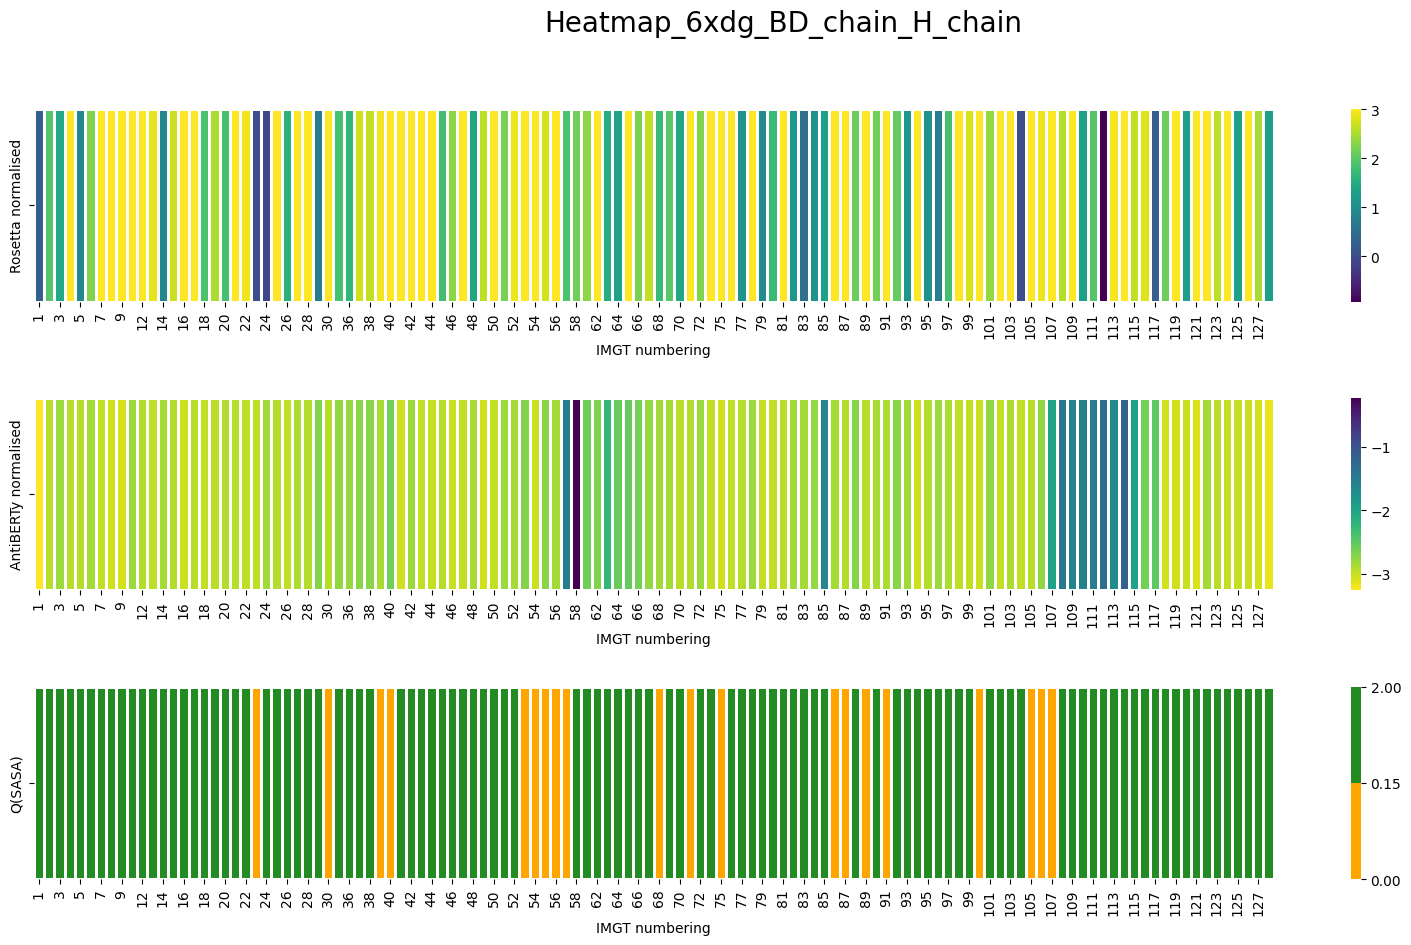

In [9]:
base_folder = "Surface information/means"
dictionary_targets = {
    "7mn8":"7mn8_DC.csv",
    "3eoa":"3eoa_BA.csv",
    "1bey":"1bey_HL.csv",
    "1ce1":"1ce1_HL.csv",
    "1n8z":"1n8z_BA.csv",
    "1l7i":"1l7i_HL.csv",
    "6vi2_BA":"6vi2_BA.csv", 
    "4hkz": "4hkz_BA.csv",
    "6b9y": "6b9y_BA.csv",
    "6bae": "6bae_BA.csv",
     # mutant variants
    
    "2fjg": "2fjg_BA.csv", 
    "5jw3_HL": "5jw3_HL.csv",
    "5jw4_MN": "5jw4_MN.csv",
    "5jw4_QR": "5jw4_QR.csv",
    "5jw4_ST": "5jw4_ST.csv",
    "5jw5_AB": "5jw5_AB.csv",
    "5jw5_HL": "5jw5_HL.csv",
    "5fha_HL": "5fha_HL.csv",
    "5fhc_HL": "5fhc_HL.csv",
    "6ws6_AB": "6ws6_AB.csv",
    "6ws6_CD": "6ws6_CD.csv",
    "6ws6_EF": "6ws6_EF.csv",
    "6xdg_CA": "6xdg_CA.csv",
    "6xdg_BD": "6xdg_BD.csv",
}

dataframes = {}

# Function to read CSV files into dataframes for a given chain type
def read_files(chain_type):
    for file_name, file in dictionary_targets.items():
        file_path = os.path.join(base_folder, chain_type, file)
        df = pd.read_csv(file_path)
        dataframes[file_name] = df

    return dataframes

# Color map settings for heatmap visualisation
colours = ["orange", "forestgreen"]
bounds = [0,0.15,2]
cmap = matplotlib.colors.ListedColormap(colours)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

def plot_heatmaps_for_chains(file_name, chain_type):
    df = dataframes[file_name]
    plt.clf()
    fig,axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

    # Plot heatmap for Rosetta normalised data
    heatmap_rosetta_data = df.pivot_table(columns=["IMGT numbering"], values="Rosetta normalised")
    sns.heatmap(heatmap_rosetta_data, vmax=3, cmap='viridis', linewidths=0.9, ax=axes[0])
    
    # Plot heatmap for AntiBERTy normalised data
    heatmap_antiberty_data = df.pivot_table(columns=["IMGT numbering"], values="AntiBERTy normalised")
    sns.heatmap(heatmap_antiberty_data, cmap='viridis_r', linewidths=0.9, ax=axes[1])
    
    # Plot heatmap for Q(SASA) data with custom color map
    heatmap_surface_access_data = df.pivot_table(columns=["IMGT numbering"], values="Q(SASA)")
    sns.heatmap(heatmap_surface_access_data, cmap=cmap, linewidths=0.9, ax=axes[2], norm=norm)

    fig.suptitle(f"Heatmap_{file_name}_{chain_type}_chain", fontsize=20)
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(f"Final work/Validation against clinically approved drugs/{file_name}/{file_name}_pictures_and_pdb_files/{chain_type}_solvent_access_vs_means.png", bbox_inches="tight")
    plt.show()

# Iterate over both chain types
for chain_type in ["chain_L", "chain_H"]:
    dataframes = read_files(chain_type)
    for file_name in dictionary_targets.keys():
        plot_heatmaps_for_chains(file_name, chain_type)